# Homework 1 - Image Classification
Mîrza Ana-Maria 341C1

The scope of this project is to explore image classification methods by comparing different processing algorithms and different models trained with the same dataset.
To achieve this, we will follow the next steps:
* Data visualization and exploration
* Attribute extraction from the data set
* Evaluation of multiple models in order to find the best solution for the given problem set 

## Datasets
We will work the the datasets [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) and [Fruits-360](https://www.kaggle.com/datasets/moltean/fruits).
The Fruits dataset contains 70 different fruits and vegetables that can be classified with different models, while the Fashion-MNIST dataset contains 10 different clothing pieces labeled as follows:

Label - Description 

0  - T-shirt/top

1  - Trouser

2  - Pullover

3  - Dress

4  - Coat

5  - Sandal

6  - Shirt

7  - Sneaker

8  - Bag

9  - Ankle boot



## Dependencies

In [2]:
# Data structures and analysis tools
import numpy as np
import pandas as pd
import cv2
import glob
import os
import gc

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.svm import SVC
import mnist_reader

from skimage.transform import resize
from skimage.feature import hog
from scipy.spatial.distance import cdist

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Training tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, precision_score, accuracy_score
import multiprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
import xgboost as xgb
import pickle

dim = 100
path = './data/fruits-360'

## Fruits-360

### Dataset Processing

In [2]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    fruit_labels = getAllFruits()
    val = ['Training', 'Test']
    if not k_fold:
        path = "./input/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            j=0

            paths = [path + entry.name for entry in os.scandir(path) 
                 if entry.is_dir() and entry.name.startswith(f)]
            for p in paths:
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(fruit_labels.index(f))
                    j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "./input/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0

                paths = [path + entry.name for entry in os.scandir(path) 
                            if entry.is_dir() and entry.name.startswith(f)]
                for p in paths:
                    for image_path in glob.glob(os.path.join(p, "*.jpg")):
                        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                        image = cv2.resize(image, (dim, dim))
                        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                        images.append(image)
                        labels.append(i)
                        j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("./input/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1].split(" ")[0]
        if fruit not in fruits:
            fruits.append(fruit)
    return fruits

fruits = getAllFruits()
print(fruits)

['Apple', 'Apricot', 'Avocado', 'Banana', 'Beetroot', 'Blueberry', 'Cabbage', 'Cactus', 'Cantaloupe', 'Carambula', 'Carrot', 'Cauliflower', 'Cherry', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Cucumber', 'Dates', 'Eggplant', 'Fig', 'Ginger', 'Granadilla', 'Grape', 'Grapefruit', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon', 'Mulberry', 'Nectarine', 'Nut', 'Onion', 'Orange', 'Papaya', 'Passion', 'Peach', 'Pear', 'Pepino', 'Pepper', 'Physalis', 'Pineapple', 'Pitahaya', 'Plum', 'Pomegranate', 'Pomelo', 'Potato', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Tamarillo', 'Tangelo', 'Tomato', 'Walnut', 'Watermelon', 'Zucchini']


In [ ]:
# Choose your Fruits
fruits = getAllFruits()

# Get Images and Labels 
for fruit in fruits:
    X_train, y_train = getYourFruits([fruit], 'Training', print_n=True, k_fold=False)
    X_test, y_test = getYourFruits([fruit], 'Test', print_n=True, k_fold=False)

    # Save data on disk
    np.save(f'./data/fruits-360/{fruit}_X_t.npy', X_train)
    np.save(f'./data/fruits-360/{fruit}_y_train.npy', y_train)
    np.save(f'./data/fruits-360/{fruit}_X_testt.npy', X_test)
    np.save(f'./data/fruits-360/{fruit}_y_test.npy', y_test)
    del X_train, y_train, X_test, y_test

There are  300   TRAINING  images of  MANGOSTAN
There are  102   TEST  images of  MANGOSTAN
There are  3444   TRAINING  images of  CHERRY
There are  1148   TEST  images of  CHERRY
There are  4401   TRAINING  images of  GRAPE
There are  1476   TEST  images of  GRAPE
There are  972   TRAINING  images of  NECTARINE
There are  324   TEST  images of  NECTARINE
There are  471   TRAINING  images of  KOHLRABI
There are  157   TEST  images of  KOHLRABI
There are  984   TRAINING  images of  PHYSALIS
There are  328   TEST  images of  PHYSALIS
There are  151   TRAINING  images of  CARROT
There are  50   TEST  images of  CARROT
There are  738   TRAINING  images of  MELON
There are  246   TEST  images of  MELON
There are  5103   TRAINING  images of  TOMATO
There are  1707   TEST  images of  TOMATO
There are  1803   TRAINING  images of  POTATO
There are  601   TEST  images of  POTATO
There are  7579   TRAINING  images of  APPLE
There are  2525   TEST  images of  APPLE
There are  450   TRAINING  image

#### Dataset Analysis

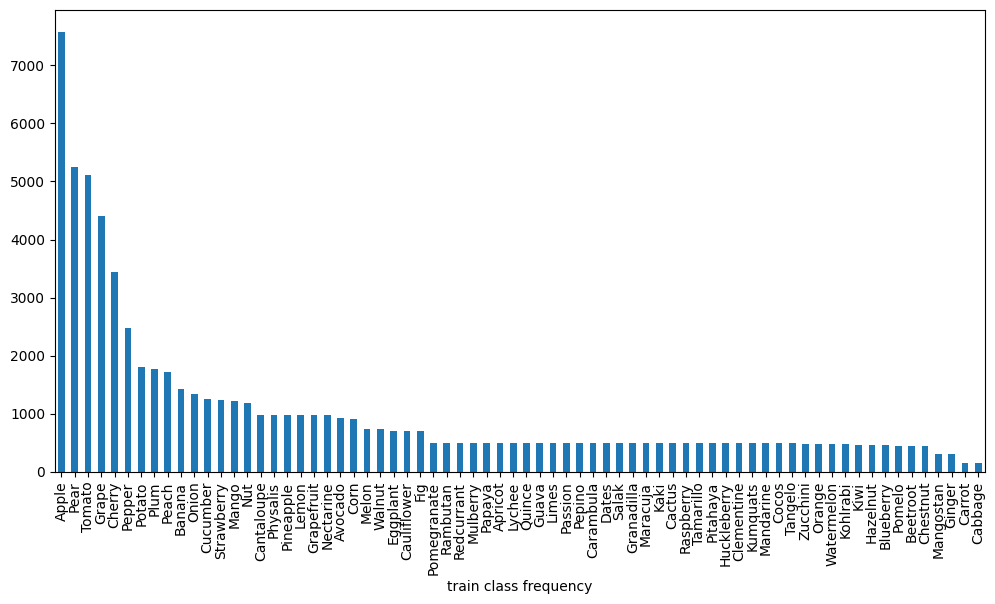

In [ ]:
# Trainig dataset analysis
y_train = np.array([], dtype=int)
fruits = getAllFruits()
for fruit in fruits:
    y_train = np.append(y_train, np.load(f'./data/fruits-360/{fruit}_y_train.npy'))

y_train2 = [fruits[i] for i in y_train]
df = pd.DataFrame(y_train2, columns=['train class frequency'])
df_freq = df['train class frequency'].value_counts()

ax = df_freq.plot.bar(x='train', y='frequency', rot=90, figsize=(12, 6))

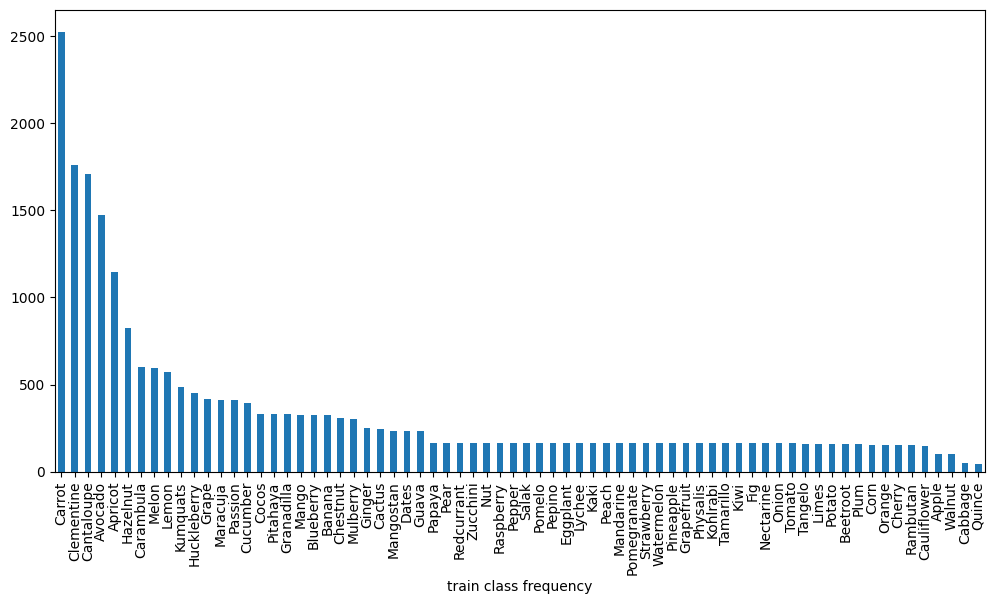

In [4]:
# Test dataset analysis
y_train = np.array([], dtype=int)
fruits = getAllFruits()
for fruit in fruits:
    y_train = np.append(y_train, np.load(f'./data/fruits-360/{fruit}_y_test.npy'))

y_train2 = [fruits[i] for i in y_train]
df = pd.DataFrame(y_train2, columns=['train class frequency'])
df_freq = df['train class frequency'].value_counts()

ax = df_freq.plot.bar(x='train', y='frequency', rot=90, figsize=(12, 6))

#### Dataset plotting

In [5]:
# Dataset image visualization
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

In [ ]:
# Most numerous classes - best 10
pd.set_option('display.max_rows', None)
sorted = pd.DataFrame(df_freq.sort_values())
print(sorted.tail(15))

top_classes = list(df_freq.sort_values().tail(10).index)
print(f'\nTop classes: {top_classes}')

                       count
train class frequency       
Nut                      396
Mango                    410
Strawberry               410
Cucumber                 417
Onion                    451
Banana                   484
Peach                    574
Plum                     597
Potato                   601
Pepper                   826
Cherry                  1148
Grape                   1476
Tomato                  1707
Pear                    1761
Apple                   2525

Top classes: ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']


['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']


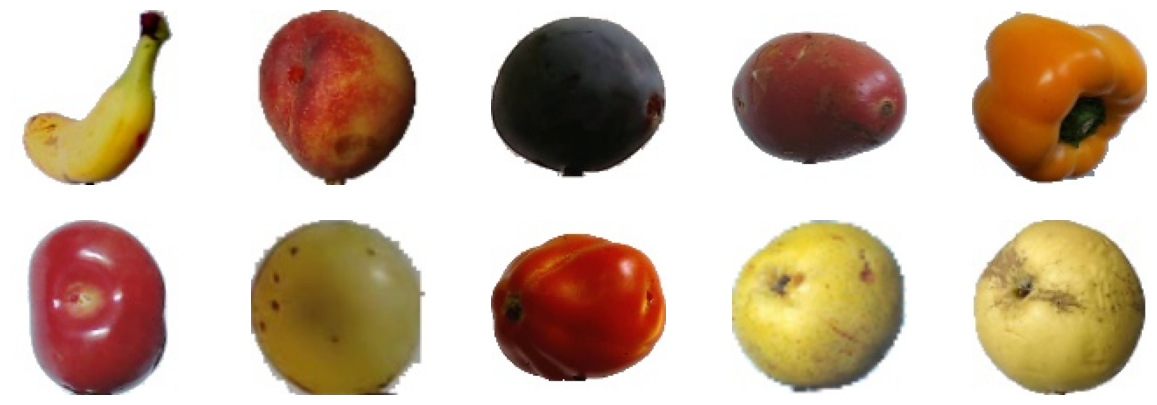

In [ ]:
# Image plotting
images = []
fruits = getAllFruits()

images = []
for fruit in top_classes:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_t.npy')
    images.append(X_train[0])
    del X_train

print(top_classes)
plot_image_grid(images, 2, 5, figsize=(15, 5))
del images

### Data Normalization

In [ ]:
# Data preprocessing
scaler = StandardScaler()

for fruit in fruits:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_t.npy')
    X_test = np.load(f'./data/fruits-360/{fruit}_X_testt.npy')

    X_train = scaler.fit_transform([i.flatten() for i in X_train])
    X_test = scaler.fit_transform([i.flatten() for i in X_test])
    
    np.save(f'./data/fruits-360/{fruit}_X_train.npy', X_train)
    np.save(f'./data/fruits-360/{fruit}_X_test.npy', X_test)
    del X_train, X_test

['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']


12

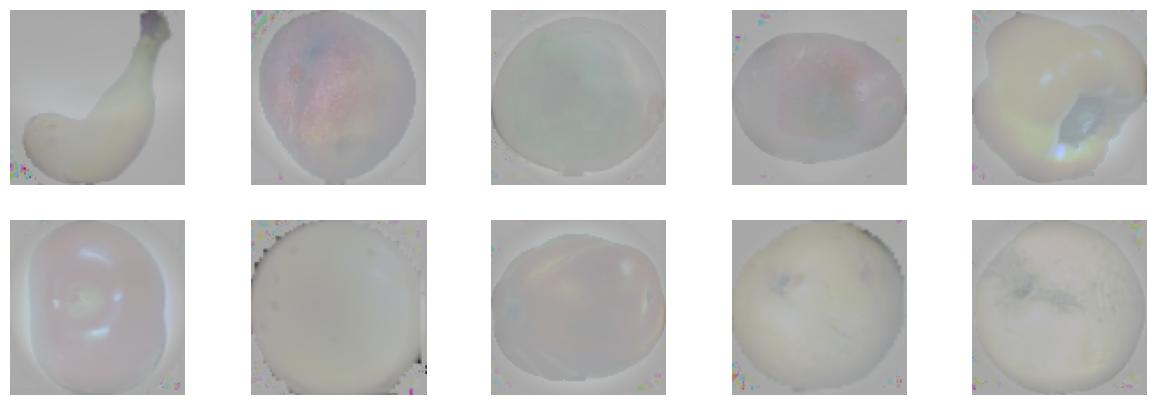

In [ ]:
# Image plotting
images = []
fruits = getAllFruits()
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']

images = np.array([])
for fruit in top_classes:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_train.npy')
    images = np.append(images, X_train[0])
    del X_train
    gc.collect()

print(top_classes)
images = np.array(images)
images = (images - images.min()) / (images.max() - images.min())
images.resize(10, dim, dim, 3)
plot_image_grid(images, 2, 5, figsize=(15, 5))
del images
gc.collect()

### Attribute Extraction: HIST

In [ ]:
# Extract number of train images
train_images = 0

for fruit in fruits:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_t.npy')
    train_images += X_train.shape[0]
    del X_train
    gc.collect()

print(f'Train images: {train_images}')
np.save(f'./data/fruits-360/train_images.npy', train_images)

Train images: 71773


In [20]:
sift_labels = []
keypoints_list = []
grays = []
images = []
n_sample = 20
i = 0

train_images = np.load(f'./data/fruits-360/train_images.npy')
print(f'Train images: {train_images}')
total_SIFT_features = np.zeros((train_images * n_sample, 128))
vocab_size = 300
sift = cv2.SIFT_create()

Train images: 71773


In [ ]:
# Extract SIFT features and build vocabulary
for fruit in fruits:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_t.npy')

    # Apply SIFT
    for image in X_train:
        # gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Selecting feature descriptors
        img = np.array(image)
        keypoints, descriptors = sift.detectAndCompute(img, None)

        # if fruit not in sift_labels and fruit in top_classes:
        #     sift_labels.append(fruit)
        #     keypoints_list.append(keypoints)
        #     grays.append(gray1)
        #     images.append(image)

        if descriptors is not None:
            # Select 20 descriptors
            desc_samples = descriptors[np.random.randint(descriptors.shape[0], size=n_sample)]
            
            # Save descriptors
            total_SIFT_features[i * n_sample:(i * n_sample) + n_sample,] = desc_samples[:]
        else:
            print(f"No keypoints found for image {i} for fruit {fruit}, skipping this image.")

        del img, keypoints, descriptors
        gc.collect()
        i += 1
    print(f'{fruit} SIFT features extracted')

print(f'Total SIFT features: {total_SIFT_features.shape}')
np.save(f'./data/fruits-360/SIFT/total_SIFT_features.npy', total_SIFT_features)

# Clustering through K-Means to obtain the vocabulary
print("Starting KMeans clustering for vocabulary")
vocab = KMeans(n_clusters=vocab_size).fit(total_SIFT_features).cluster_centers_
print("KMeans clustering finished: ", vocab.shape)

# Save vocabulary
np.save('./data/fruits-360/SIFT/vocabulary.npy', vocab)
del X_train, total_SIFT_features
gc.collect()

Train images: 71773
Mangostan SIFT features extracted
Cherry SIFT features extracted
Grape SIFT features extracted
Nectarine SIFT features extracted
Kohlrabi SIFT features extracted
Physalis SIFT features extracted
Carrot SIFT features extracted
Melon SIFT features extracted
Tomato SIFT features extracted
Potato SIFT features extracted
Apple SIFT features extracted
Beetroot SIFT features extracted
Chestnut SIFT features extracted
Avocado SIFT features extracted
Pear SIFT features extracted
Grapefruit SIFT features extracted
Kiwi SIFT features extracted
Nut SIFT features extracted
Cauliflower SIFT features extracted
Guava SIFT features extracted
Mulberry SIFT features extracted
Walnut SIFT features extracted
Pineapple SIFT features extracted
Cucumber SIFT features extracted
Limes SIFT features extracted
Fig SIFT features extracted
Pepper SIFT features extracted
Onion SIFT features extracted
Kaki SIFT features extracted
Redcurrant SIFT features extracted
Apricot SIFT features extracted
B

0

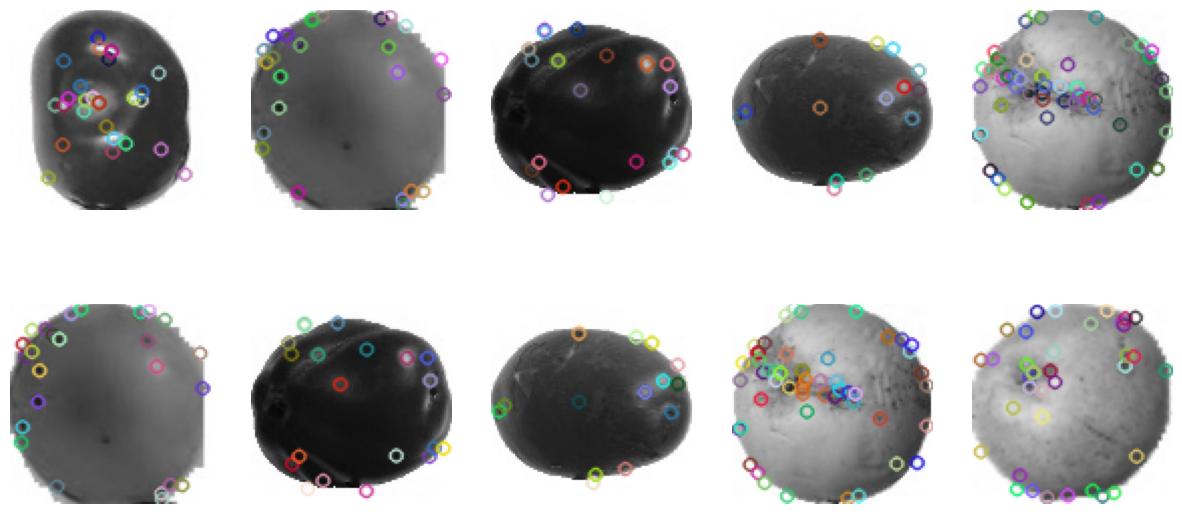

In [15]:
# Visualization of SIFT features
fig, axs = plt.subplots(2, 5, figsize=(15, 7))

for i in range(2):
    for j in range(5):
        img = cv2.drawKeypoints(grays[i * 1 + j], keypoints_list[i * 1 + j], images[i * 1 + j])
        axs[i, j].axis('off')
        axs[i, j].imshow(img)

In [ ]:
# Classify images using histograms
def get_feats(X, y, vocab):
    feats = []
    i = 0
    for image in X:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        _ , descriptors = sift.detectAndCompute(image, None)

        if descriptors is not None:
            dist = cdist(descriptors, vocab, 'euclidean')
            bin_assignment = np.argmin(dist, axis=1)

            image_feats = np.zeros(vocab.shape[0])
            for id_assigment in bin_assignment:
                image_feats[id_assigment] += 1  

            feats.append(image_feats)
        else:
            # delete the image from the dataset
            y = np.delete(y, i)
            print("No descriptors found for image, skipping this image.")
        i += 1
    
    # Normalize
    feats = np.asarray(feats)
    feats_norm_div = np.linalg.norm(feats, axis=1)

    for i in range(feats.shape[0]):
        feats[i] = feats[i] / feats_norm_div[i]

    return feats, y
    

In [15]:
# Get histograms for all images
vocab = np.load('./data/fruits-360/SIFT/vocabulary.npy')
fruits = getAllFruits()

for fruit in fruits:
    X = np.load(f'./data/fruits-360/{fruit}_X_t.npy')
    y = np.load(f'./data/fruits-360/{fruit}_y_train.npy')
    X_feats, y = get_feats(X, y, vocab)
    np.save(f'./data/fruits-360/SIFT/{fruit}_X_train_SIFT.npy', X_feats)
    np.save(f'./data/fruits-360/SIFT/{fruit}_y_train_SIFT.npy', y)

    X = np.load(f'./data/fruits-360/{fruit}_X_testt.npy')
    y = np.load(f'./data/fruits-360/{fruit}_y_test.npy')
    X_feats, y = get_feats(X, y, vocab)
    np.save(f'./data/fruits-360/SIFT/{fruit}_X_test_SIFT.npy', X_feats)
    np.save(f'./data/fruits-360/SIFT/{fruit}_y_test_SIFT.npy', y)

    print(f'{fruit} SIFT histograms extracted')

    del X, X_feats, y
    gc.collect()

Mangostan SIFT histograms extracted
Cherry SIFT histograms extracted
Grape SIFT histograms extracted
Nectarine SIFT histograms extracted
Kohlrabi SIFT histograms extracted
Physalis SIFT histograms extracted
Carrot SIFT histograms extracted
Melon SIFT histograms extracted
Tomato SIFT histograms extracted
Potato SIFT histograms extracted
Apple SIFT histograms extracted
Beetroot SIFT histograms extracted
Chestnut SIFT histograms extracted
Avocado SIFT histograms extracted
Pear SIFT histograms extracted
Grapefruit SIFT histograms extracted
Kiwi SIFT histograms extracted
Nut SIFT histograms extracted
Cauliflower SIFT histograms extracted
Guava SIFT histograms extracted
Mulberry SIFT histograms extracted
Walnut SIFT histograms extracted
Pineapple SIFT histograms extracted
Cucumber SIFT histograms extracted
Limes SIFT histograms extracted
Fig SIFT histograms extracted
Pepper SIFT histograms extracted
Onion SIFT histograms extracted
Kaki SIFT histograms extracted
Redcurrant SIFT histograms ext

### Attribute Extration: PCA

#### Scale Images

In [8]:
def resize_images(images, new_size=(20, 20)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1], images.shape[3]), dtype=np.uint8)
    for i in range(images.shape[0]):
        resized_image = cv2.resize(images[i].astype(np.uint8), new_size, interpolation=cv2.INTER_AREA)
        resized_images[i] = resized_image
    return resized_images

for fruit in fruits:
    X = np.load(f'./data/fruits-360/{fruit}_X_t.npy')
    print(f'{fruit} images shape: {X.shape}')
    X_resized = resize_images(X)
    X_resized = np.reshape(X_resized, (X_resized.shape[0], 400 * 3))
    print(f'{fruit} resized images shape: {X_resized.shape}')
    np.save(f'./data/fruits-360/{fruit}_X_train_resized.npy', X_resized)

    X = np.load(f'./data/fruits-360/{fruit}_X_testt.npy')
    X_resized = resize_images(X)
    X_resized = np.reshape(X_resized, (X_resized.shape[0], 400 * 3))
    np.save(f'./data/fruits-360/{fruit}_X_test_resized.npy', X_resized)
    
    print(f'{fruit} images resized')
    del X, X_resized
    gc.collect()

Mangostan images shape: (300, 100, 100, 3)
Mangostan resized images shape: (300, 1200)
Mangostan images resized
Cherry images shape: (3444, 100, 100, 3)
Cherry resized images shape: (3444, 1200)
Cherry images resized
Grape images shape: (4401, 100, 100, 3)
Grape resized images shape: (4401, 1200)
Grape images resized
Nectarine images shape: (972, 100, 100, 3)
Nectarine resized images shape: (972, 1200)
Nectarine images resized
Kohlrabi images shape: (471, 100, 100, 3)
Kohlrabi resized images shape: (471, 1200)
Kohlrabi images resized
Physalis images shape: (984, 100, 100, 3)
Physalis resized images shape: (984, 1200)
Physalis images resized
Carrot images shape: (151, 100, 100, 3)
Carrot resized images shape: (151, 1200)
Carrot images resized
Melon images shape: (738, 100, 100, 3)
Melon resized images shape: (738, 1200)
Melon images resized
Tomato images shape: (5103, 100, 100, 3)
Tomato resized images shape: (5103, 1200)
Tomato images resized
Potato images shape: (1803, 100, 100, 3)
Po

['Mangostan', 'Cherry', 'Grape', 'Nectarine', 'Kohlrabi', 'Physalis', 'Carrot', 'Melon', 'Tomato', 'Potato']


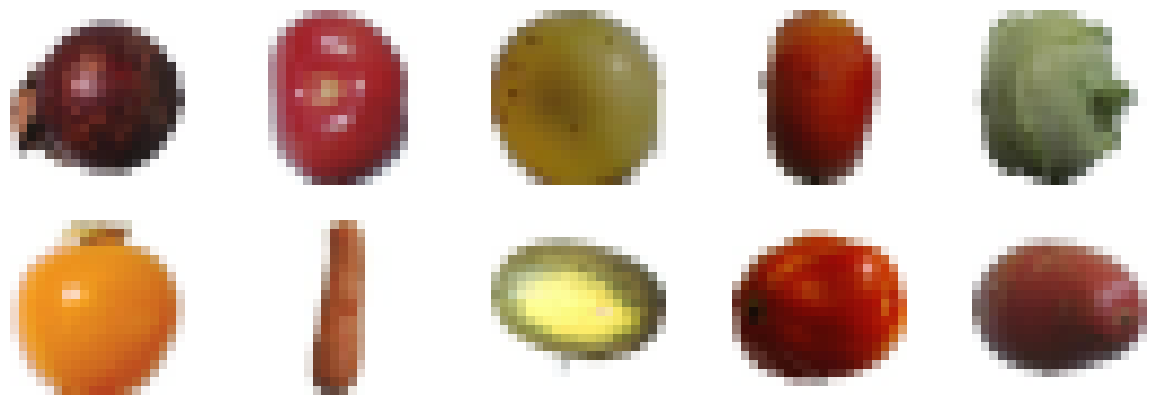

In [ ]:
# Image plotting
images = []
fruits = getAllFruits()

images = []
for fruit in fruits[:10]:
    X_train = np.load(f'./data/fruits-360/{fruit}_X_train_resized.npy')
    images.append(X_train[0])
    del X_train

print(fruits[:10])
plot_image_grid(images, 2, 5, figsize=(15, 5))
del images

#### PCA

In [ ]:
# Concatenate all data
X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'./data/fruits-360/{fruit}_X_train_resized.npy'))

# Scale data and save
X = np.reshape(X, (int(X.shape[0] / 1200), 1200))
print(f'X train shape: {X.shape}')
np.save(f'./data/fruits-360/X_train20x20.npy', X)

del X
gc.collect()
X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'./data/fruits-360/{fruit}_X_test_resized.npy'))

# Scale data and save
X = np.reshape(X, (int(X.shape[0] / 1200), 1200))
print(f'X test shape: {X.shape}')
np.save(f'./data/fruits-360/X_test20x20.npy', X)

del X
gc.collect()

X train shape: (71773, 1200)
X train shape after PCA: (71773, 50)
X test shape: (24051, 1200)
X test shape after PCA: (24051, 50)


242

In [71]:
X_train = np.load(f'./data/fruits-360/X_train20x20.npy')
X_test = np.load(f'./data/fruits-360/X_test20x20.npy')

# Apply PCA on dataset
pca_dim = 70
pca = PCA(n_components=pca_dim)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

np.save(f'./data/fruits-360/X_train_pca.npy', X_train)
np.save(f'./data/fruits-360/X_test_pca.npy', X_test)
print(f'X train shape after PCA: {X_train.shape}')
print(f'X test shape after PCA: {X_test.shape}')

X train shape after PCA: (71773, 70)
X test shape after PCA: (24051, 70)


In [ ]:
# Concatenate all label data
y_train = np.array([], dtype=int)
for fruit in fruits:
    y_train = np.append(y_train, np.load(f'./data/fruits-360/{fruit}_y_train.npy'))

print(f'y train shape: {y_train.shape}')
np.save(f'./data/fruits-360/y_train.npy', y_train)

y_test = np.array([], dtype=int)
for fruit in fruits:
    y_test = np.append(y_test, np.load(f'./data/fruits-360/{fruit}_y_test.npy'))

print(f'y test shape: {y_test.shape}')
np.save(f'./data/fruits-360/y_test.npy', y_test)
del y_train, y_test
gc.collect()

y train shape: (71773,)
y test shape: (24051,)


374

#### Vizualizarea atributiilor extrase

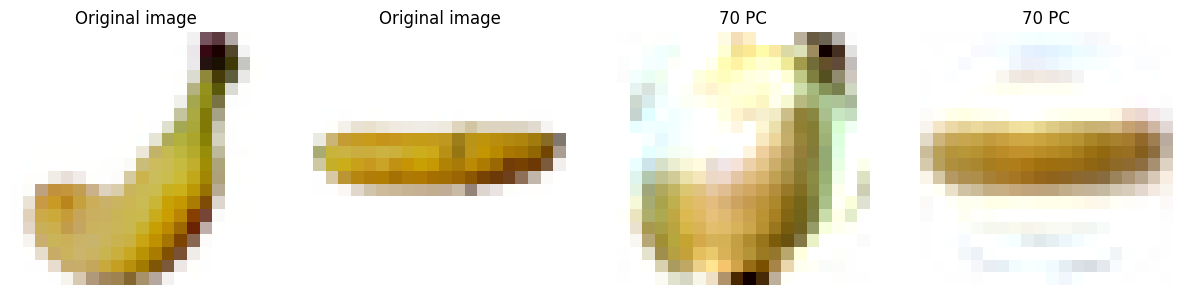

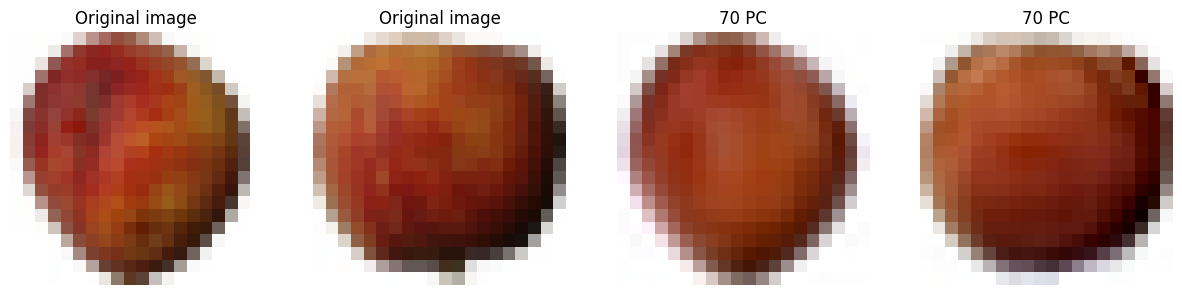

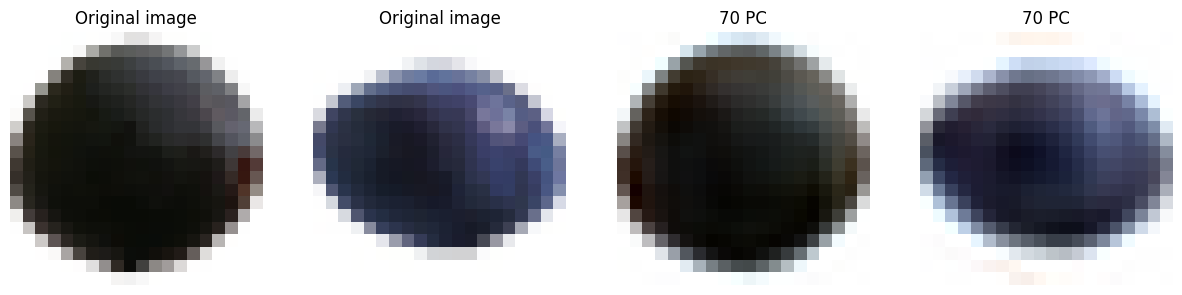

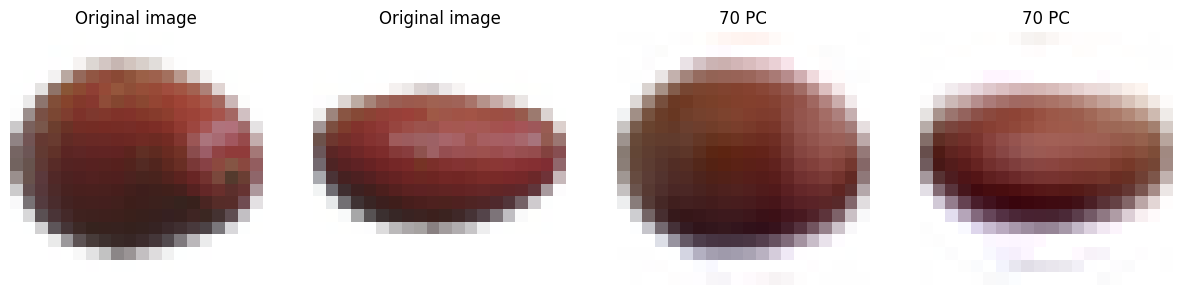

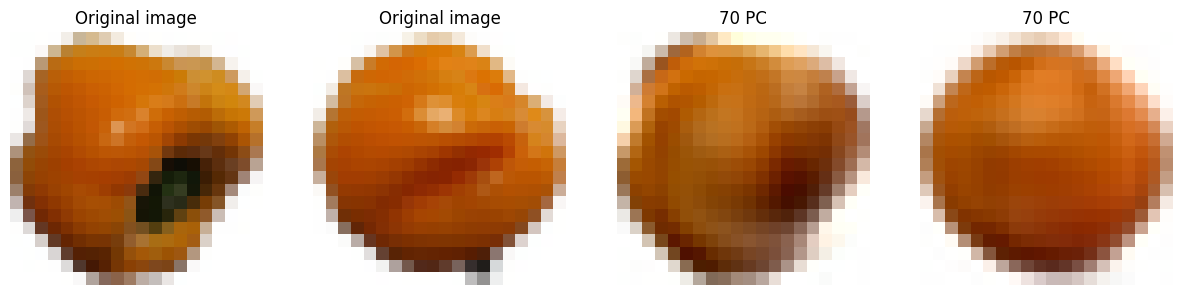

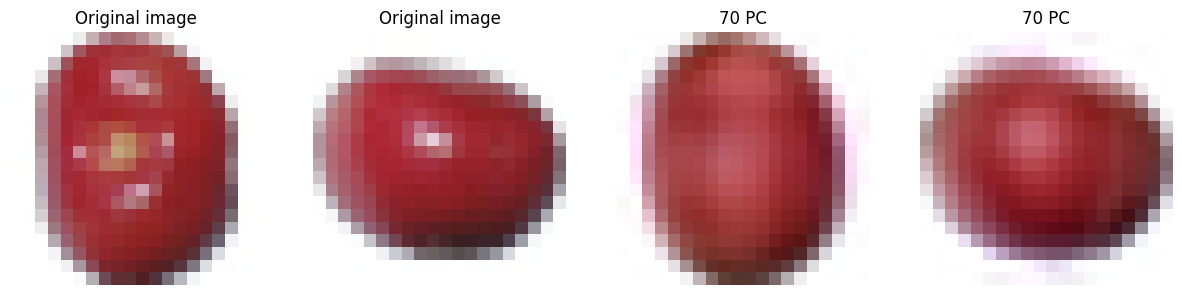

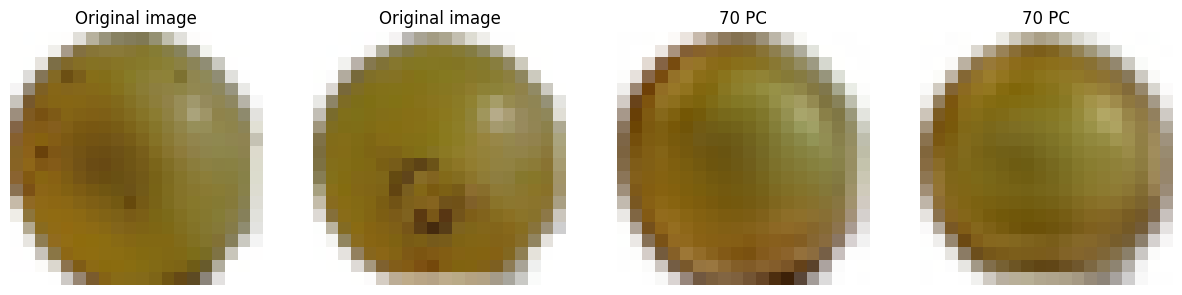

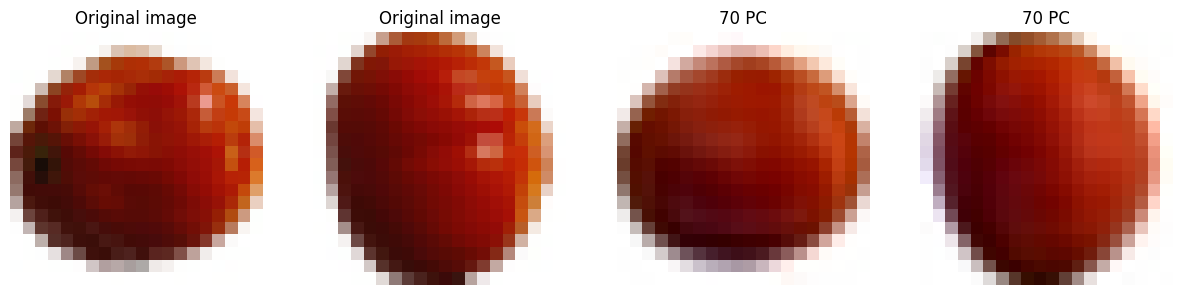

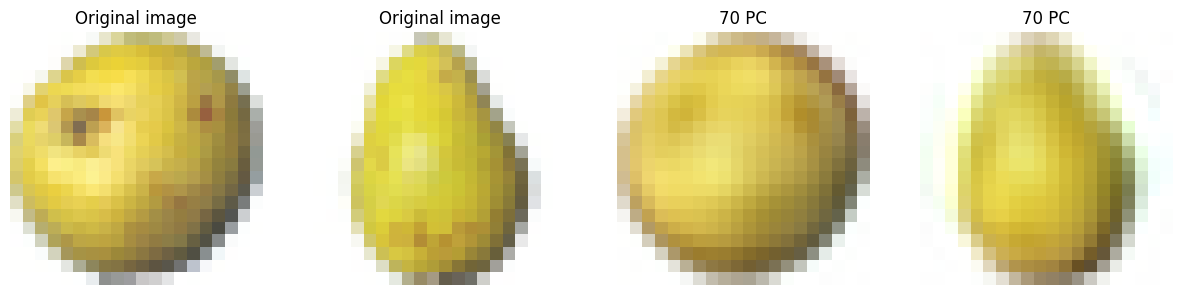

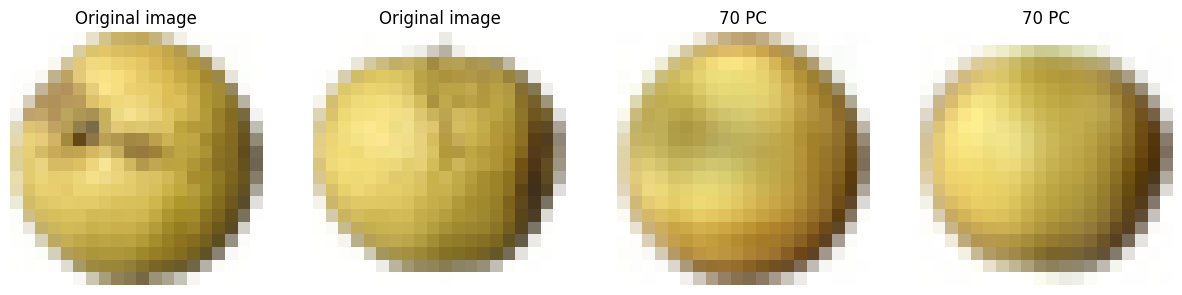

In [72]:
def showPCA(image,X2, X10, X50, dim=20):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image, cmap='Accent')
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('Original image')
    plt.imshow(X2)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title(f'{dim} PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title(f'{dim} PC')
    plt.imshow(X50)
    plt.show()

# Visualization of PCA attributes extracted
dim = 20
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
for fruit in top_classes:
    X_t20 = np.load(f'./data/fruits-360/X_train_pca.npy')
    y_train = np.load(f'./data/fruits-360/y_train.npy')
    X_train = np.load(f'./data/fruits-360/{fruit}_X_train_resized.npy')
    index = list(y_train).index(fruits.index(fruit))

    image1 = X_train[0]
    image1 = np.reshape(image1, (dim,dim,3)).astype(int)
    image2 = X_train[1]
    image2 = np.reshape(image2, (dim,dim,3)).astype(int)

    image3 = pca.inverse_transform(X_t20[index])
    image3 = scaler.inverse_transform(image3.reshape(1, -1))
    image3 = np.reshape(image3, (dim,dim,3)).astype(int)
    image4 = pca.inverse_transform(X_t20[index + 1])
    image4 = scaler.inverse_transform(image4.reshape(1, -1))
    image4 = np.reshape(image4, (dim,dim,3)).astype(int)

    # clip the values to be between 0 and 255
    image1 = np.clip(image1, 0, 255)
    image2 = np.clip(image2, 0, 255)
    image3 = np.clip(image3, 0, 255)
    image4 = np.clip(image4, 0, 255)

    showPCA(image1, image2, image3, image4, pca_dim)

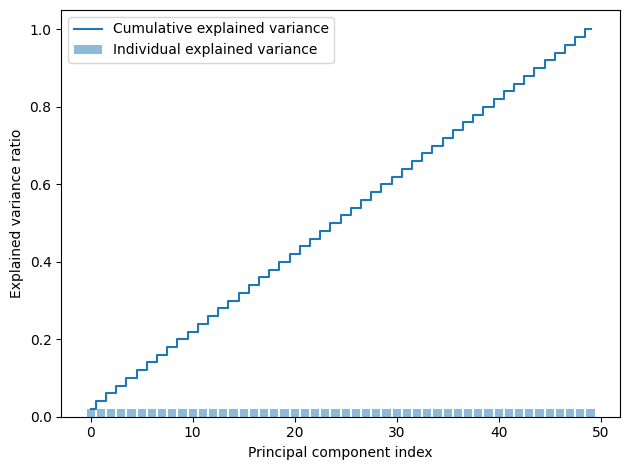

In [56]:
X_train = np.load(f'./data/fruits-360/X_train_pca.npy')
cov_matrix = np.cov(X_train, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = np.linalg.eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Attribute Extration: HOG 

In [16]:
# Visualization of HOG attributes extracted
def showHOG(X_train, X_resized, X_hog, index):
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(X_train[index])
    plt.title("original")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(X_resized[index])
    plt.title("resized")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(X_hog[index], cmap="gray")
    plt.title("hog")
    plt.show()

def resize_image(img):
    resized_img = resize(img, (128, 64))
    return resized_img

def apply_hog(resized_img):
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    return fd, hog_image


In [26]:
images = []
hog_images = []
img_labels = []

# Apply HOG on dataset
for fruit in fruits:
    X_HOG = []
    X_t = np.load(f'./data/fruits-360/{fruit}_X_t.npy')

    # Training batch
    for image in X_t:
        fd, hog_image = apply_hog(image)
        X_HOG.append(fd)

        # Save images for visualization
        if fruit not in img_labels and fruit in top_classes:
            images.append(image)
            img_labels.append(fruit)
            hog_images.append(hog_image)

    X_HOG = np.array(X_HOG)
    np.save(f'./data/fruits-360/{fruit}_X_HOG_train.npy', X_HOG)

    # Testing batch
    X_t = np.load(f'./data/fruits-360/{fruit}_X_testt.npy')
    X_HOG = []
    for image in X_t:
        fd, _ = apply_hog(image)
        X_HOG.append(fd)

    X_HOG = np.array(X_HOG)
    np.save(f'./data/fruits-360/{fruit}_X_HOG_test.npy', X_HOG)
    del X_HOG, X_t
    gc.collect()
    print(f'{fruit} done')

hog_images = np.array(hog_images)
images = np.array(images)
np.save(f'./data/fruits-360/hog_images.npy', hog_images)
np.save(f'./data/fruits-360/original_images.npy', images)

Apple done
Apricot done
Avocado done
Banana done
Beetroot done
Blueberry done
Cabbage done
Cactus done
Cantaloupe done
Carambula done
Carrot done
Cauliflower done
Cherry done
Chestnut done
Clementine done
Cocos done
Corn done
Cucumber done
Dates done
Eggplant done
Fig done
Ginger done
Granadilla done
Grape done
Grapefruit done
Guava done
Hazelnut done
Huckleberry done
Kaki done
Kiwi done
Kohlrabi done
Kumquats done
Lemon done
Limes done
Lychee done
Mandarine done
Mango done
Mangostan done
Maracuja done
Melon done
Mulberry done
Nectarine done
Nut done
Onion done
Orange done
Papaya done
Passion done
Peach done
Pear done
Pepino done
Pepper done
Physalis done
Pineapple done
Pitahaya done
Plum done
Pomegranate done
Pomelo done
Potato done
Quince done
Rambutan done
Raspberry done
Redcurrant done
Salak done
Strawberry done
Tamarillo done
Tangelo done
Tomato done
Walnut done
Watermelon done
Zucchini done


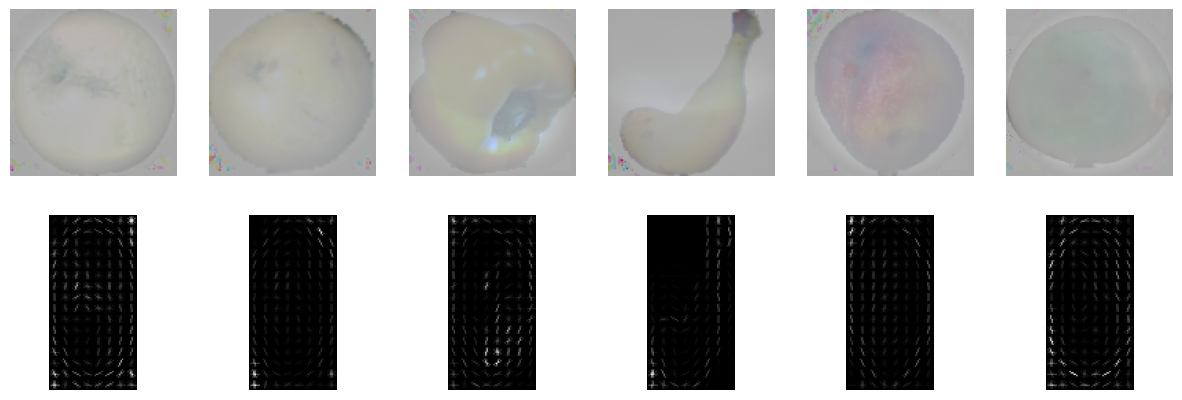

In [ ]:
# Visualizaton of HOG features on top 10 classes
images = np.load(f'./data/fruits-360/original_images.npy')
hog_images = np.load(f'./data/fruits-360/hog_images.npy')

size = len(images)
fig, axs = plt.subplots(2, size, figsize=(15, 5))
images = (images - images.min()) / (images.max() - images.min())
for i in range(size):
    axs[0, i].axis('off')
    axs[0, i].imshow(images[i])
    axs[1, i].axis('off')
    axs[1, i].imshow(hog_images[i], cmap="gray")

In [27]:
# Append hog features
X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'./data/fruits-360/{fruit}_X_HOG_train.npy'))

# Save train dataset
y = np.load(f'./data/fruits-360/y_train.npy')
X = np.reshape(X, (y.shape[0], int(X.shape[0] / y.shape[0])))
print(f'X_train shape: {X.shape}')
print(f'y_train shape: {y.shape}')
np.save(f'./data/fruits-360/X_HOG_train.npy', X)

X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'./data/fruits-360/{fruit}_X_HOG_test.npy'))

# Save test dataset
y = np.load(f'./data/fruits-360/y_test.npy')
X = np.reshape(X, (y.shape[0], int(X.shape[0] / y.shape[0])))
print(f'X_test shape: {X.shape}')
print(f'y_test shape: {y.shape}')
np.save(f'./data/fruits-360/X_HOG_test.npy', X)

del X
gc.collect()

X_train shape: (71773, 4356)
y_train shape: (71773,)
X_test shape: (24051, 4356)
y_test shape: (24051,)


275

### Attribute Extraction: PCA - HOG

In [47]:
X_train = np.load(f'./data/fruits-360/X_HOG_train.npy')
X_test = np.load(f'./data/fruits-360/X_HOG_test.npy')

# Apply PCA on dataset
pca_dim = 70
pca = PCA(n_components=pca_dim)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

np.save(f'./data/fruits-360/X_train_hog_pca.npy', X_train)
np.save(f'./data/fruits-360/X_test_hog_pca.npy', X_test)
print(f'X train shape after PCA: {X_train.shape}')
print(f'X test shape after PCA: {X_test.shape}')

X train shape after PCA: (71773, 70)
X test shape after PCA: (24051, 70)


### Attribute Extraction: HIST

In [61]:
# Concatenate all data
X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'./data/fruits-360/SIFT/{fruit}_X_train_SIFT.npy'))

# Scale data and save
X = np.reshape(X, (int(X.shape[0] / vocab_size), vocab_size))
print(f'X train shape: {X.shape}')
np.save(f'./data/fruits-360/SIFT/X_train_SIFT.npy', X)

X = np.array([])
for fruit in fruits:
    X = np.append(X, np.load(f'.\/data/fruits-360/SIFT/{fruit}_X_test_SIFT.npy'))

# Scale data and save
X = np.reshape(X, (int(X.shape[0] / vocab_size), vocab_size))
print(f'X test shape: {X.shape}')
np.save(f'./data/fruits-360/SIFT/X_test_SIFT.npy', X)

del X
gc.collect()

y = np.array([], dtype=int)
for fruit in fruits:
    y = np.append(y, np.load(f'./data/fruits-360/SIFT/{fruit}_y_train_SIFT.npy'))

print(f'y train shape: {y.shape}')
np.save(f'./data/fruits-360/SIFT/y_train_SIFT.npy', y)

y = np.array([], dtype=int)
for fruit in fruits:
    y = np.append(y, np.load(f'./data/fruits-360/SIFT/{fruit}_y_test_SIFT.npy'))

print(f'y test shape: {y.shape}')
np.save(f'./data/fruits-360/SIFT/y_test_SIFT.npy', y)

X train shape: (71766, 300)
X test shape: (24050, 300)
y train shape: (71766,)
y test shape: (24050,)


In [51]:
# Apply PCA extraction on HIST features
pca_dim = 250
pca = PCA(n_components=pca_dim)
scaler = StandardScaler()

X_train = np.load(f'./data\/fruits-360/SIFT/X_train_SIFT.npy')
X_test = np.load(f'./data/fruits-360/SIFT/X_test_SIFT.npy')
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

print(f'X train shape after PCA: {X_train.shape}')
print(f'X test shape after PCA: {X_test.shape}')

np.save(f'./data/fruits-360/SIFT/X_train_SIFT_pca.npy', X_train)    
np.save(f'./data/fruits-360/SIFT/X_test_SIFT_pca.npy', X_test)


X train shape after PCA: (71766, 250)
X test shape after PCA: (24050, 250)


### Attribute Selection

#### PCA features Split

In [53]:
X_train = np.load(f'./data/fruits-360/X_train_pca.npy')
y_train = np.load(f'./data/fruits-360/y_train.npy')

# Split the training batch into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

# Save data
np.save(f'./data/fruits-360/X_PCA_train.npy', X_train)
np.save(f'./data/fruits-360/X_PCA_validation.npy', X_validation)
np.save(f'./data/fruits-360/y_PCA_train.npy', y_train)
np.save(f'./data/fruits-360/y_PCA_validation.npy', y_validation)

del X_train, X_validation, y_train, y_validation
gc.collect()

22

#### HIST features Split

In [83]:
# Get HIST features
X_train = np.load('./data/fruits-360/SIFT/X_train_SIFT.npy')
y_train = np.load('./data/fruits-360/SIFT/y_train_SIFT.npy')

# Shuffle data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

# Split the training batch into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

print(f'X train shape: {X_train.shape}')
print(f'X validation shape: {X_validation.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y validation shape: {y_validation.shape}')

# Save data
np.save(f'./data/fruits-360/SIFT/X_SIFT_train.npy', X_train)
np.save(f'./data/fruits-360/SIFT/X_SIFT_validation.npy', X_validation)
np.save(f'./data/fruits-360/SIFT/y_SIFT_train.npy', y_train)
np.save(f'./data/fruits-360/SIFT/y_SIFT_validation.npy', y_validation)

X train shape: (57412, 300)
X validation shape: (14354, 300)
y train shape: (57412,)
y validation shape: (14354,)


#### HOG - PCA Feature Split

In [39]:
X_train = np.load(f'./data/fruits-360/X_train_hog_pca.npy')
y_train = np.load(f'./data/fruits-360/y_train.npy')

# Split the training batch into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# Save data
np.save(f'./data/fruits-360/X_PCA_HOG_train.npy', X_train)
np.save(f'./data/fruits-360/X_PCA_HOG_validation.npy', X_validation)
np.save(f'./data/fruits-360/y_PCA_HOG_train.npy', y_train)
np.save(f'./data/fruits-360/y_PCA_HOG_validation.npy', y_validation)

del X_train, X_validation, y_train, y_validation
gc.collect()

66

### Model Training

#### PCA Features

##### Logistic Regression

In [83]:
# Hyperparameter Tunning
param_grid = [
    {'C' : [0.1, 1, 0.01],
    'multi_class' : ['ovr', 'multinomial'],
    'solver': ['newton-cg']
    }
]

X_validation = np.load(f'./data/fruits-360/X_PCA_validation.npy')
y_validation = np.load(f'./data/fruits-360/y_PCA_validation.npy')

# Find best hyperparameters
print("Starting hyper-parameter search")
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X_validation, y_validation)
print("Finished grid search")

Starting hyper-parameter search


/home/anami/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/anami/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/anami/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/anami/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_cl

Finished grid search


In [84]:
X_train = np.load(f'./data/fruits-360/X_PCA_train.npy')
y_train = np.load(f'./data/fruits-360/y_PCA_train.npy')

# Training model
LogisticRegressionModel = grid.best_estimator_
LogisticRegressionModel.fit(X_train, y_train)

/home/anami/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [ ]:
X_test = np.load(f'./data/fruits-360/X_test_pca.npy')
y_test = np.load(f'./data/fruits-360/y_test.npy')

# Evaluate model
y_pred_reg = LogisticRegressionModel.predict(X_test)
precision = metrics.accuracy_score(y_pred_reg, y_test) * 100
print("Accuracy with Logistic Regression considering first 70PC: {0:.2f}% \n".format(precision))

Accuracy with Logistic Regression considering first 20PC: 71.78% 



In [88]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_C', 'param_solver', 'param_multi_class', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight on best parameters
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_solver,param_multi_class,mean_test_score
1.000000,newton-cg,multinomial,0.863741
0.100000,newton-cg,multinomial,0.854058
1.000000,newton-cg,ovr,0.812957
0.010000,newton-cg,multinomial,0.811285
0.100000,newton-cg,ovr,0.804458
0.010000,newton-cg,ovr,0.768931


In [89]:
# Grid with scores
target_names = fruits
print(metrics.classification_report(y_test, y_pred_reg, target_names=target_names))

              precision    recall  f1-score   support

   Mangostan       0.50      0.19      0.27       102
      Cherry       0.79      0.66      0.72      1148
       Grape       0.68      0.78      0.73      1476
   Nectarine       0.27      0.30      0.28       324
    Kohlrabi       0.94      0.76      0.84       157
    Physalis       0.88      0.94      0.91       328
      Carrot       0.78      1.00      0.88        50
       Melon       0.71      0.85      0.77       246
      Tomato       0.66      0.65      0.65      1707
      Potato       0.44      0.32      0.37       601
       Apple       0.61      0.63      0.62      2525
    Beetroot       0.83      0.47      0.60       150
    Chestnut       0.62      0.69      0.65       153
     Avocado       0.88      0.93      0.90       309
        Pear       0.59      0.62      0.60      1761
  Grapefruit       0.50      0.58      0.54       330
        Kiwi       0.87      0.69      0.77       156
         Nut       0.46    

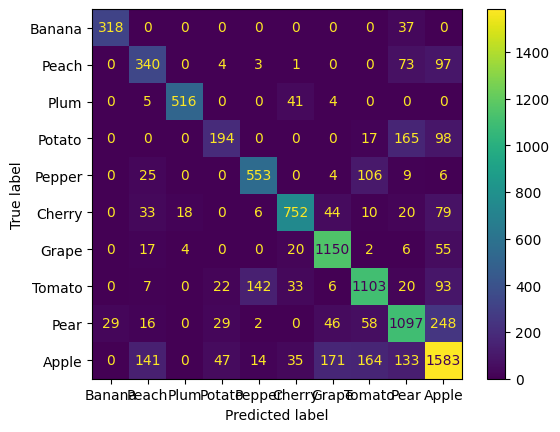

In [94]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred_reg, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### SVM

In [95]:
# Hyperparameter Tunning
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': ['scale', 'auto'], 
              'kernel': ['poly', 'rbf'],
              'random_state': [0, 16, 19, None] 
            }

X_validation = np.load(f'./data/fruits-360/X_PCA_validation.npy')
y_validation = np.load(f'./data/fruits-360/y_PCA_validation.npy')

svm_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_validation, y_validation)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf'],
                         'random_state': [0, 16, 19, None]},
             scoring='accuracy')

In [96]:
X_train = np.load(f'./data/fruits-360/X_PCA_train.npy')
y_train = np.load(f'./data/fruits-360/y_PCA_train.npy')

# Training model
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='poly', random_state=0)

In [98]:
X_test = np.load(f'./data/fruits-360/X_test_pca.npy')
y_test = np.load(f'./data/fruits-360/y_test.npy')

# Evaluate model
y_pred = svm_model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM considering first 20PC: {0:.2f}%".format(precision))

Accuracy with SVM considering first 20PC: 92.35%


In [99]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(svm_grid.cv_results_)
df = df[['param_C', 'param_gamma', 'param_kernel', 'param_random_state', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_gamma,param_kernel,param_random_state,mean_test_score
0.100000,auto,poly,0,0.975061
0.100000,auto,poly,16,0.975061
0.100000,auto,poly,19,0.975061
0.100000,auto,poly,None,0.975061
10.000000,scale,rbf,None,0.974922
10.000000,scale,rbf,19,0.974922
10.000000,scale,rbf,16,0.974922
10.000000,scale,rbf,0,0.974922
1.000000,auto,poly,0,0.974364
1.000000,auto,poly,16,0.974364


In [100]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Mangostan       0.45      0.38      0.41       102
      Cherry       0.94      0.93      0.94      1148
       Grape       0.87      0.86      0.86      1476
   Nectarine       0.97      0.79      0.87       324
    Kohlrabi       1.00      1.00      1.00       157
    Physalis       0.99      1.00      0.99       328
      Carrot       0.62      1.00      0.76        50
       Melon       0.95      1.00      0.98       246
      Tomato       0.99      0.98      0.98      1707
      Potato       0.89      0.92      0.90       601
       Apple       0.93      0.94      0.94      2525
    Beetroot       0.71      0.72      0.72       150
    Chestnut       0.81      0.93      0.87       153
     Avocado       0.95      0.99      0.97       309
        Pear       0.94      0.86      0.90      1761
  Grapefruit       0.50      0.62      0.55       330
        Kiwi       0.88      1.00      0.93       156
         Nut       0.94    

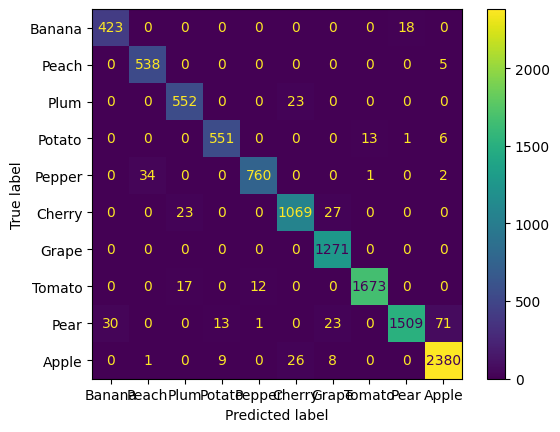

In [101]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### Random Forest

In [5]:
# Hyperparameter Tunning
param_grid = { 
    'n_estimators': [50, 100],
    'max_depth': [5, 8, None],
    'max_samples': [0.3, 0.7, None]
} 

X_validation = np.load(f'./data/fruits-360/X_PCA_validation.npy')
y_validation = np.load(f'./data/fruits-360/y_PCA_validation.npy')

rforest_grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', n_jobs=-1)
rforest_grid.fit(X_validation, y_validation)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, None],
                         'max_samples': [0.3, 0.7, None],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [7]:
X_train = np.load(f'./data/fruits-360/X_PCA_train.npy')
y_train = np.load(f'./data/fruits-360/y_PCA_train.npy')

# Training model
rforest_model = rforest_grid.best_estimator_
rforest_model = rforest_model.fit(X_train, y_train)

In [8]:
X_test = np.load(f'./data/fruits-360/X_test_pca.npy')
y_test = np.load(f'./data/fruits-360/y_test.npy')

# Evaluate model
y_pred = rforest_model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Random Forest considering first 20PC: {0:.2f}%".format(precision))

Accuracy with Random Forest considering first 20PC: 87.31%


In [9]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(rforest_grid.cv_results_)
df = df[['param_n_estimators', 'param_max_depth', 'param_max_samples', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_n_estimators,param_max_depth,param_max_samples,mean_test_score
100,None,None,0.952072
50,None,None,0.949147
100,None,0.700000,0.947544
50,None,0.700000,0.943365
100,None,0.300000,0.926576
50,None,0.300000,0.918844
100,8,None,0.684848
50,8,0.700000,0.680669
50,8,None,0.679624
100,8,0.700000,0.678997


In [10]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Mangostan       0.49      0.44      0.47       102
      Cherry       0.88      0.95      0.91      1148
       Grape       0.82      0.87      0.85      1476
   Nectarine       0.94      0.59      0.72       324
    Kohlrabi       0.97      0.68      0.80       157
    Physalis       0.98      1.00      0.99       328
      Carrot       0.72      1.00      0.84        50
       Melon       0.93      0.99      0.96       246
      Tomato       0.87      0.96      0.91      1707
      Potato       0.74      0.78      0.76       601
       Apple       0.74      0.99      0.84      2525
    Beetroot       0.68      0.39      0.49       150
    Chestnut       0.85      0.76      0.80       153
     Avocado       0.95      0.93      0.94       309
        Pear       0.82      0.79      0.80      1761
  Grapefruit       0.50      0.51      0.51       330
        Kiwi       0.99      0.94      0.96       156
         Nut       0.93    

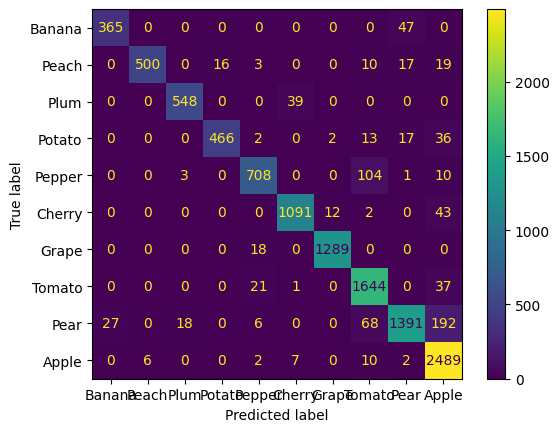

In [12]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### Gradient Boosted Trees

In [4]:
# Hyperparameter Tunning
X_validation = np.load(f'./data/fruits-360/X_PCA_validation.npy')
y_validation = np.load(f'./data/fruits-360/y_PCA_validation.npy')

param_grid = {
    "max_depth": [4, 6], 
    "num_parallel_tree": [4, 6],
    "eta": [0.3, 0.45]
}

gboost_grid = GridSearchCV(
    xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count()),
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)
gboost_grid.fit(X_validation, y_validation)

# Save model using pickle
filename = './models/xgb_model.pkl'
pickle.dump(gboost_grid, open(filename, 'wb'))

In [5]:
X_train = np.load(f'./data/fruits-360/X_PCA_train.npy')
y_train = np.load(f'./data/fruits-360/y_PCA_train.npy')

# Training model 
gboost_model = gboost_grid.best_estimator_
gboost_model = gboost_model.fit(X_train, y_train)

# Save model
filename = './models/xgb_model.pkl'
pickle.dump(gboost_model, open(filename, 'wb'))

In [6]:
X_test = np.load(f'./data/fruits-360/X_test_pca.npy')
y_test = np.load(f'./data/fruits-360/y_test.npy')

# Evaluate model
y_pred = gboost_model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Gradient Boosted Treea considering first 20PC: {0:.2f}%".format(precision))

Accuracy with Gradient Boosted Treea considering first 20PC: 81.16%


In [8]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(gboost_grid.cv_results_)
df = df[['param_max_depth', 'param_num_parallel_tree', 'param_eta', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_max_depth,param_num_parallel_tree,param_eta,mean_test_score
4,6,0.300000,0.935980
4,4,0.300000,0.935772
6,4,0.300000,0.931452
6,6,0.300000,0.931452
4,4,0.450000,0.921491
4,6,0.450000,0.921282
6,6,0.450000,0.909370
6,4,0.450000,0.909300


In [ ]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Pineapple       0.91      0.98      0.95       329
       Cocos       0.96      0.82      0.89       166
      Carrot       1.00      0.96      0.98        50
       Guava       1.00      1.00      1.00       166

    accuracy                           0.95       711
   macro avg       0.97      0.94      0.95       711
weighted avg       0.95      0.95      0.95       711



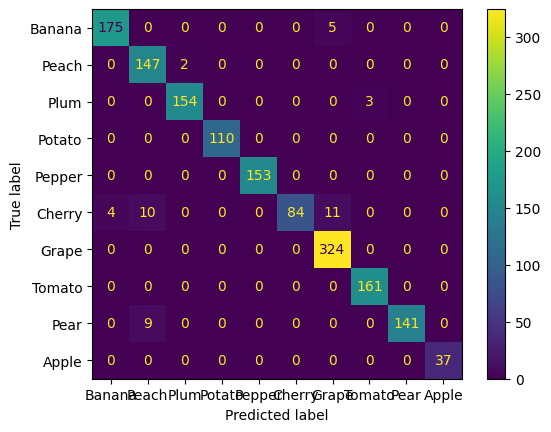

In [15]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

#### SIFT Features

##### Logistic Regression

In [128]:
X_validation = np.load(f'./data/fruits-360/SIFT/X_SIFT_validation.npy')
y_validation = np.load(f'./data/fruits-360/SIFT/y_SIFT_validation.npy')

# Hyperparameter Tunning
param_grid = [
    {'C' : [1, 10, 20, 50],
    'multi_class' : ['ovr', 'multinomial'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [1000]
    }
]

grid = HalvingGridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1)
grid = grid.fit(X_validation, y_validation)

# Save model
filename = './models/logistic_regression__hist_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [129]:
X_train = np.load(f'./data/fruits-360/SIFT/X_SIFT_train.npy')
y_train = np.load(f'./data/fruits-360/SIFT/y_SIFT_train.npy')

# Training model
model = grid.best_estimator_
model = model.fit(X_train, y_train)

C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [130]:
X_test = np.load(f'./data/fruits-360/SIFT/X_test_SIFT.npy')
y_test = np.load(f'./data/fruits-360/SIFT/y_test_SIFT.npy')

# Evaluate model
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Logistic Regression and HOG: {0:.2f}%".format(precision))

Accuracy with Logistic Regression and HOG: 61.78%


In [131]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_C', 'param_solver', 'param_multi_class', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_solver,param_multi_class,mean_test_score
20,lbfgs,multinomial,0.615019
20,lbfgs,ovr,0.611208
50,sag,multinomial,0.609780
50,saga,multinomial,0.609463
20,lbfgs,ovr,0.486422
20,lbfgs,multinomial,0.485470
50,saga,multinomial,0.484514
50,sag,multinomial,0.483562
50,lbfgs,multinomial,0.483562
50,newton-cg,multinomial,0.483562


In [132]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Apple       0.45      0.31      0.37       102
     Apricot       0.71      0.65      0.68      1148
     Avocado       0.57      0.68      0.62      1476
      Banana       0.26      0.22      0.24       324
    Beetroot       0.66      0.75      0.70       157
   Blueberry       0.75      0.75      0.75       328
     Cabbage       0.92      0.92      0.92        50
      Cactus       0.78      0.74      0.76       246
  Cantaloupe       0.64      0.68      0.66      1707
   Carambula       0.40      0.33      0.36       601
      Carrot       0.46      0.56      0.51      2525
 Cauliflower       0.33      0.21      0.25       150
      Cherry       0.38      0.31      0.35       153
    Chestnut       0.66      0.73      0.70       309
  Clementine       0.50      0.48      0.49      1761
       Cocos       0.45      0.27      0.34       330
        Corn       0.61      0.56      0.58       156
    Cucumber       0.50    

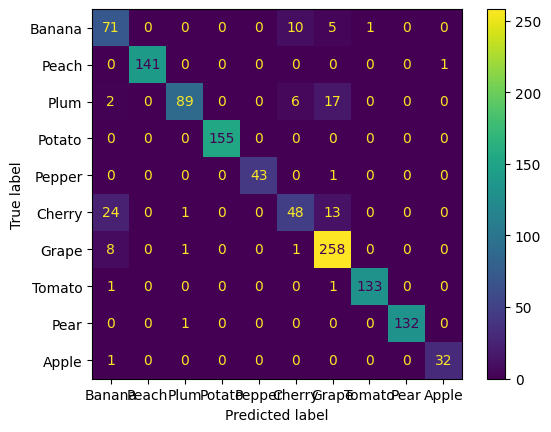

In [133]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### SVM

In [101]:
X_validation = np.load(f'./data/fruits-360/SIFT/X_SIFT_validation.npy')
y_validation = np.load(f'./data/fruits-360/SIFT/y_SIFT_validation.npy')

# Hyperparameter Tunning
param_grid = {'C': [1, 5, 10],  
              'gamma': ['scale', 'auto'], 
              'kernel': ['poly', 'rbf']
            }

grid = GridSearchCV(SVC(), param_grid, refit = 'accuracy', n_jobs=-1)
grid = grid.fit(X_validation, y_validation)

# Save model
filename = './models/svm_hist_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [102]:
X_train = np.load(f'./data/fruits-360/SIFT/X_SIFT_train.npy')
y_train = np.load(f'./data/fruits-360/SIFT/y_SIFT_train.npy')

# Training model
model = grid.best_estimator_
model = model.fit(X_train, y_train)

# Save model
filename = './models/svm_hist_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [103]:
X_test = np.load(f'./data/fruits-360/SIFT/X_test_SIFT.npy')
y_test = np.load(f'./data/fruits-360/SIFT/y_test_SIFT.npy')

# Evaluate model
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM and HIST: {0:.2f}%".format(precision))

Accuracy with SVM and HIST: 70.89%


In [104]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_gamma,param_kernel,mean_test_score
10,scale,rbf,0.762366
5,scale,rbf,0.761878
1,scale,rbf,0.702731
10,scale,poly,0.686778
5,scale,poly,0.686778
1,scale,poly,0.672844
10,auto,rbf,0.310715
5,auto,rbf,0.215550
1,auto,rbf,0.108959
1,auto,poly,0.108959


In [105]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Apple       0.46      0.12      0.19       102
     Apricot       0.79      0.82      0.81      1148
     Avocado       0.61      0.80      0.69      1476
      Banana       0.44      0.34      0.38       324
    Beetroot       0.81      0.81      0.81       157
   Blueberry       0.90      0.87      0.88       328
     Cabbage       0.94      0.92      0.93        50
      Cactus       0.84      0.76      0.80       246
  Cantaloupe       0.71      0.80      0.75      1707
   Carambula       0.48      0.50      0.49       601
      Carrot       0.53      0.79      0.64      2525
 Cauliflower       0.68      0.27      0.39       150
      Cherry       0.65      0.35      0.45       153
    Chestnut       0.75      0.83      0.79       309
  Clementine       0.64      0.66      0.65      1761
       Cocos       0.46      0.24      0.32       330
        Corn       0.69      0.54      0.60       156
    Cucumber       0.62    

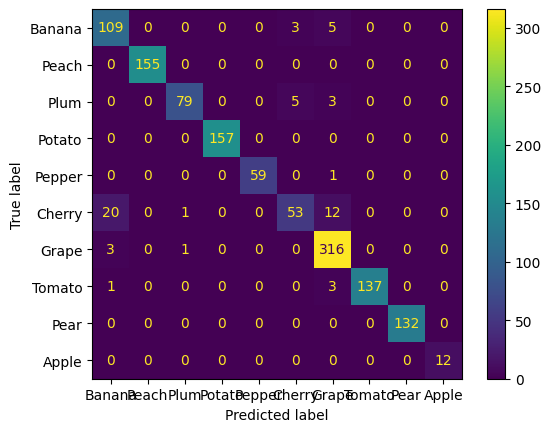

In [107]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### Random Forest

In [ ]:
X_validation = np.load(f'./data/fruits-360/SIFT/X_SIFT_validation.npy')
y_validation = np.load(f'./data/fruits-360/SIFT/y_SIFT_validation.npy')

# Hyperparameter Tunning
param_grid = { 
    'n_estimators': [300, 500],
    'max_depth': [100, 200, 300],
    'max_samples': [0.5, 0.7, 1.0]
} 

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = 'accuracy', n_jobs=-1)
grid = grid.fit(X_validation, y_validation)

# Save model
filename = './models/random_forest_hist_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
X_train = np.load(f'./data/fruits-360/SIFT/X_SIFT_train.npy')
y_train = np.load(f'./data/fruits-360/SIFT/y_SIFT_train.npy')

# Training model
model = grid.best_estimator_
model = model.fit(X_train, y_train)

# Save model
filename = './models/random_forest_hist_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [13]:
X_test = np.load(f'./data/fruits-360/SIFT/X_test_SIFT.npy')
y_test = np.load(f'./data/fruits-360/SIFT/y_test_SIFT.npy')

# Load model
filename = './models/random_forest_hist_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Evaluate model
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Random Forests and HIST: {0:.2f}%".format(precision))
print(grid.best_params_)

Accuracy with Random Forests and HIST: 59.46%
{'eta': 0.3, 'max_depth': 6, 'num_parallel_tree': 4}


In [7]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_n_estimators', 'param_max_depth', 'param_max_samples', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_n_estimators,param_max_depth,param_max_samples,mean_test_score
500,300,1.000000,0.610562
500,200,1.000000,0.609518
500,100,1.000000,0.609239
250,300,1.000000,0.606104
250,200,1.000000,0.605685
250,100,1.000000,0.602272
200,100,1.000000,0.601993
200,300,1.000000,0.601924
200,200,1.000000,0.598580
500,300,0.700000,0.593843


In [14]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Apple       0.00      0.00      0.00       102
     Apricot       0.72      0.80      0.76      1148
     Avocado       0.55      0.76      0.64      1476
      Banana       0.48      0.14      0.22       324
    Beetroot       0.78      0.73      0.75       157
   Blueberry       0.94      0.66      0.78       328
     Cabbage       0.82      0.84      0.83        50
      Cactus       0.75      0.39      0.51       246
  Cantaloupe       0.61      0.81      0.70      1707
   Carambula       0.33      0.22      0.26       601
      Carrot       0.36      0.80      0.49      2525
 Cauliflower       0.64      0.14      0.23       150
      Cherry       0.55      0.20      0.30       153
    Chestnut       0.65      0.76      0.70       309
  Clementine       0.44      0.65      0.52      1761
       Cocos       0.47      0.08      0.14       330
        Corn       0.78      0.13      0.23       156
    Cucumber       0.54    

C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

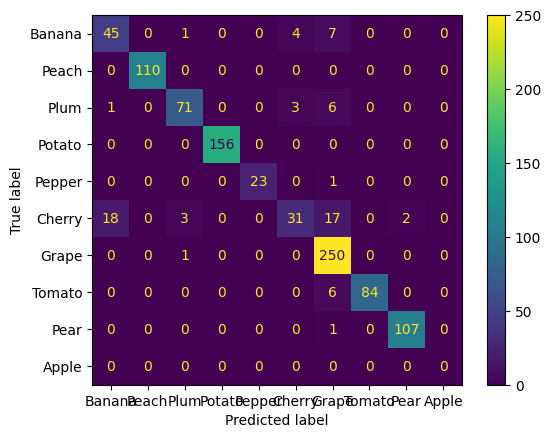

In [15]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()

##### Gradient Boosted Trees

In [4]:
X_validation = np.load(f'./data/fruits-360/SIFT/X_SIFT_validation.npy')
y_validation = np.load(f'./data/fruits-360/SIFT/y_SIFT_validation.npy')

# Hyperparameter Tunning
param_grid = {
    "max_depth": [4, 6], 
    "num_parallel_tree": [4, 6],
    "eta": [0.3, 0.45]
}
grid = HalvingGridSearchCV(
    xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count()),
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)

grid.fit(X_validation, y_validation)

# Save model
filename = './odels/xgb_hist_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [5]:
X_train = np.load(f'./data/fruits-360/SIFT/X_SIFT_train.npy')
y_train = np.load(f'./data/fruits-360/SIFT/y_SIFT_train.npy')

# Training model 
model = grid.best_estimator_
model = model.fit(X_train, y_train)

# Save model
filename = './models/xgb_hist_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
X_test = np.load(f'./data/fruits-360/SIFT/X_test_SIFT.npy')
y_test = np.load(f'./data/fruits-360/SIFT/y_test_SIFT.npy')

# Evaluate model
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Gradient Boosted Trees: {0:.2f}%".format(precision))
print(grid.best_params_)

Accuracy with Gradient Boosted Trees and HOG: 59.38%
{'eta': 0.3, 'max_depth': 6, 'num_parallel_tree': 4}


In [7]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_max_depth', 'param_num_parallel_tree', 'param_eta', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_max_depth,param_num_parallel_tree,param_eta,mean_test_score
6,4,0.300000,0.619765
6,6,0.300000,0.619277
6,4,0.450000,0.610983
6,6,0.300000,0.502092
6,4,0.300000,0.501883
6,4,0.450000,0.497490
4,4,0.300000,0.494979
4,6,0.300000,0.494770
6,6,0.450000,0.492469
4,6,0.450000,0.490795


In [8]:
# Performance evaluation
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Apple       0.47      0.23      0.30       102
     Apricot       0.71      0.73      0.72      1148
     Avocado       0.54      0.75      0.63      1476
      Banana       0.37      0.24      0.29       324
    Beetroot       0.77      0.66      0.71       157
   Blueberry       0.80      0.76      0.78       328
     Cabbage       0.87      0.82      0.85        50
      Cactus       0.75      0.56      0.64       246
  Cantaloupe       0.60      0.70      0.65      1707
   Carambula       0.30      0.27      0.29       601
      Carrot       0.42      0.68      0.52      2525
 Cauliflower       0.40      0.17      0.23       150
      Cherry       0.50      0.31      0.39       153
    Chestnut       0.75      0.65      0.70       309
  Clementine       0.45      0.57      0.50      1761
       Cocos       0.41      0.23      0.30       330
        Corn       0.59      0.31      0.40       156
    Cucumber       0.50    

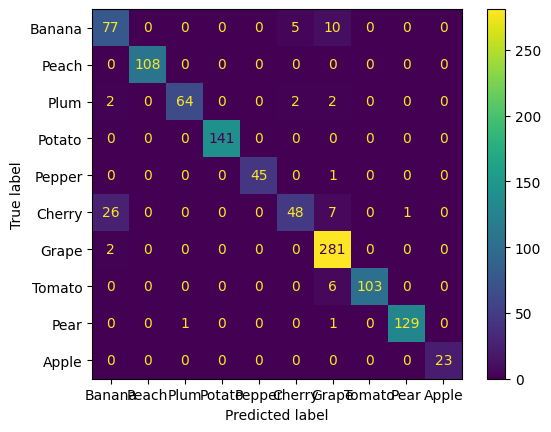

In [12]:
# Confusion matrix
top_classes = ['Banana', 'Peach', 'Plum', 'Potato', 'Pepper', 'Cherry', 'Grape', 'Tomato', 'Pear', 'Apple']
labels = [fruits.index(fruit) for fruit in top_classes]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=top_classes)
disp.plot()
plt.show()


#### HOG - PCA Features

##### Logistic Regression

In [ ]:
# Hyperparameter Tunning
param_grid = [
    {'C' : [0.1, 1],
    'penalty' : ['l2', None],
    'multi_class' : ['ovr', 'multinomial'],
    'solver': ['newton-cg']
    }
]

X_validation = np.load(f'./data/fruits-360/X_PCA_HOG_validation.npy')
y_validation = np.load(f'./data/fruits-360/y_PCA_HOG_validation.npy')

# Find best hyperparameters
print("Starting hyper-parameter search")
grid = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X_validation, y_validation)
print("Finished grid search")

# Save model
filename = './odels/lg_hog_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

Starting hyper-parameter search


C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Finished grid search


In [56]:
X_train = np.load(f'./data/fruits-360/X_PCA_HOG_train.npy')
y_train = np.load(f'./data/fruits-360/y_PCA_HOG_train.npy')

# Training model
LogisticRegressionModel = grid.best_estimator_
LogisticRegressionModel.fit(X_train, y_train)

# Save model
filename = './models/lg_hog_model2.pkl'
pickle.dump(LogisticRegressionModel, open(filename, 'wb'))

C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [57]:
X_test = np.load(f'./data/fruits-360/X_test_hog_pca.npy')
y_test = np.load(f'./data/fruits-360/y_test.npy')

# Evaluate model
y_pred_reg = LogisticRegressionModel.predict(X_test)
precision = metrics.accuracy_score(y_pred_reg, y_test) * 100
print("Accuracy with Logistic Regression: {0:.2f}% \n".format(precision))

Accuracy with Logistic Regression: 1.00% 



In [66]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Parameter grid
df = pd.DataFrame(grid.cv_results_)
df = df[['param_C', 'param_solver', 'param_multi_class', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Apply highlight on best parameters
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_solver,param_multi_class,mean_test_score
1.000000,newton-cg,multinomial,0.576315
1.000000,newton-cg,ovr,0.557436
0.100000,newton-cg,multinomial,0.553396
1.000000,newton-cg,multinomial,0.553396
0.100000,newton-cg,ovr,0.549983
1.000000,newton-cg,ovr,0.549983
0.100000,newton-cg,multinomial,0.541344
0.100000,newton-cg,ovr,0.523650


---
## Fashion-MNIST

### Dataset Processing

In [3]:
X_train, y_train = mnist_reader.load_mnist('input/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('input/fashion', kind='t10k')
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
# salvare date
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [5]:
# Vizualizare date
def gen_image(first_image):
    first_image = np.array(first_image)
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    return plt

def plot_mnist_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            first_image = np.array(images[i * nb_rows + j])
            pixels = first_image.reshape((28, 28))

            if nb_rows > 1:
                axs[i, j].axis('off')
                axs[i, j].imshow(pixels, cmap='gray')
            else:
                axs[j].axis('off')
                axs[j].imshow(pixels, cmap='gray')
            n += 1

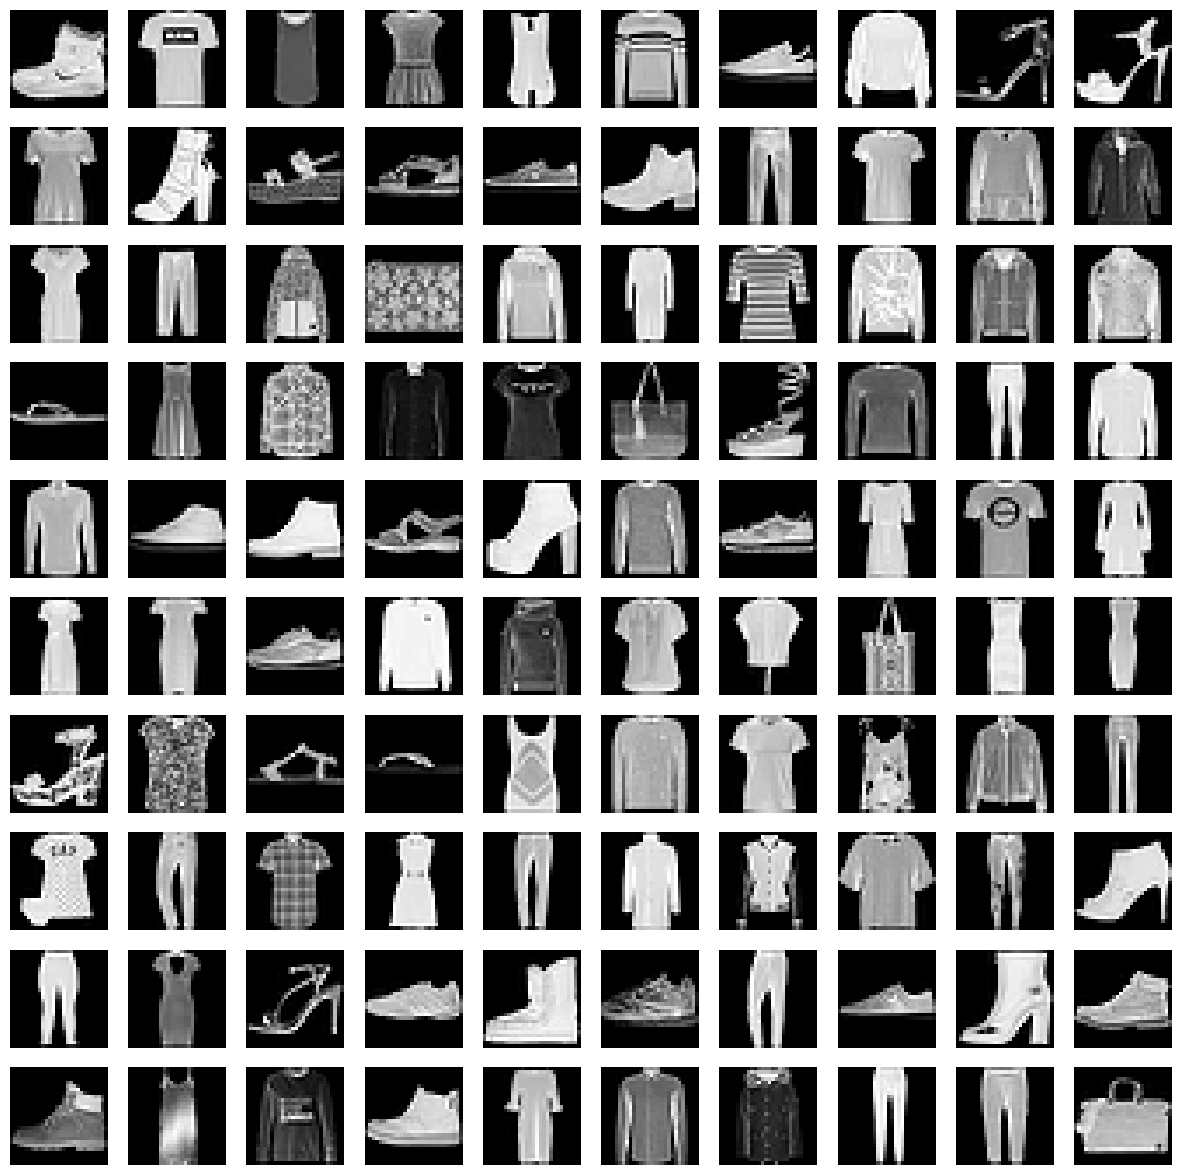

In [6]:
plot_mnist_grid(X_train[:100], 10, 10)

### Dataset Analysis

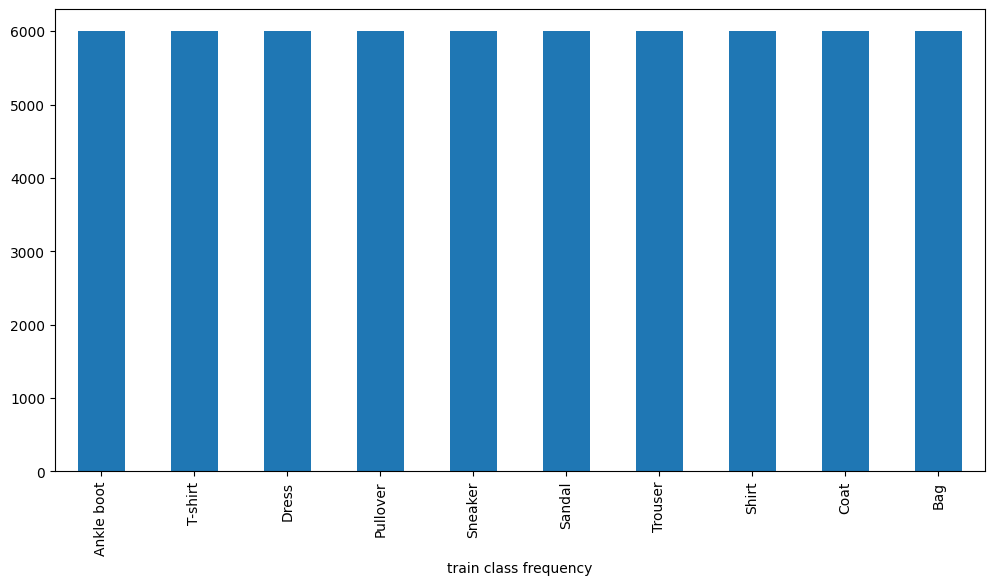

In [7]:
# Vizualizarea echilibrului dater de antrenare
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

mapped_y = [labels[i] for i in y_train]
df = pd.DataFrame(mapped_y, columns=['train class frequency'])
df_freq = df['train class frequency'].value_counts()

ax = df_freq.plot.bar(x='train', y='frequency', rot=90, figsize=(12, 6))

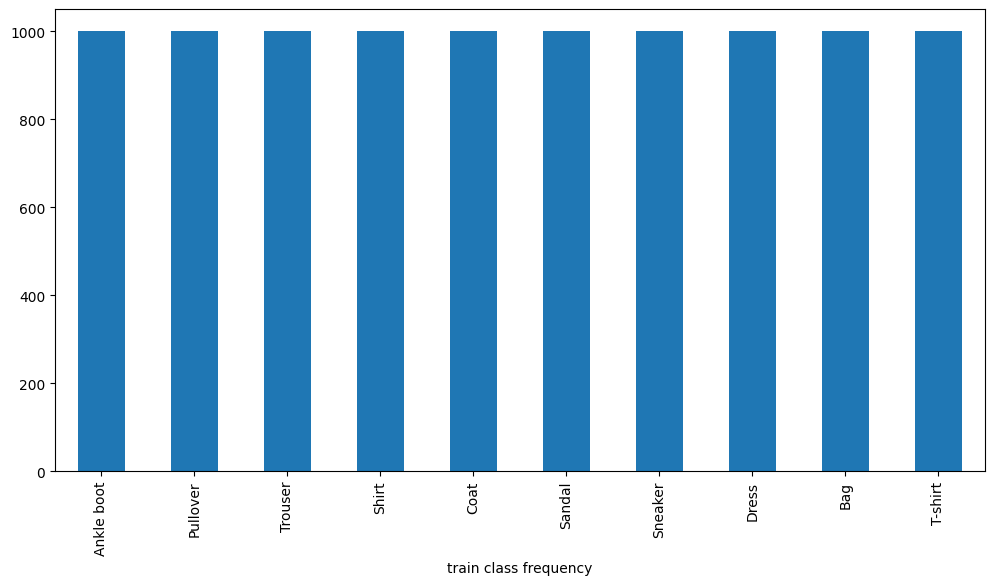

In [8]:
# Vizualizarea echilibrului dater de testare
mapped_y = [labels[i] for i in y_test]
df = pd.DataFrame(mapped_y, columns=['train class frequency'])
df_freq = df['train class frequency'].value_counts()

ax = df_freq.plot.bar(x='train', y='frequency', rot=90, figsize=(12, 6))

### Data Normalization

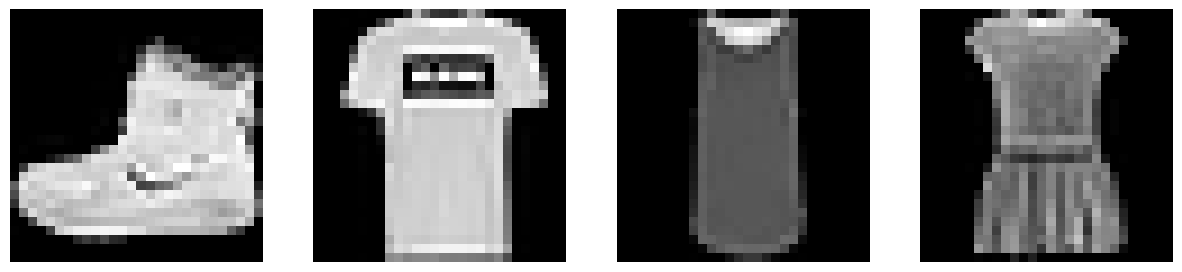

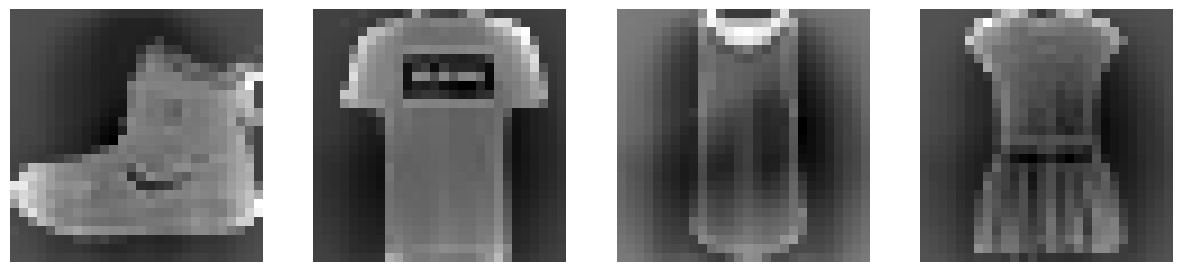

In [9]:
# Scalarea datelor de intrare
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

plot_mnist_grid(X_train[:4], 1, 4)
plot_mnist_grid(X_train_scaled[:4], 1, 4)
X_train = X_train_scaled

# Salvarea datelor pe disk
np.save('data/fashion/X_train', X_train)
np.save('data/fashion/X_test', X_test)

# Eliberarea memoriei
del X_train_scaled, X_train, y_train, X_test, y_test

### Attribute Extraction: PCA

In [10]:
# Aplicați PCA pe datele de antrenament și testare
X_train = np.load('data/fashion/X_train.npy')
X_test = np.load('data/fashion/X_test.npy')

pca = PCA(n_components=20)
X_train20 = pca.fit_transform(X_train)
X_test20 = pca.transform(X_test)

# Vizualiare PCA
print(X_train.shape)
print(X_train20.shape)

# Salvarea datelor pe disk
np.save('data/fashion/X_train20', X_train20)
np.save('data/fashion/X_test20', X_test20)

# Eliberarea memoriei
del X_train20, X_test20, X_train

(60000, 784)
(60000, 20)


['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


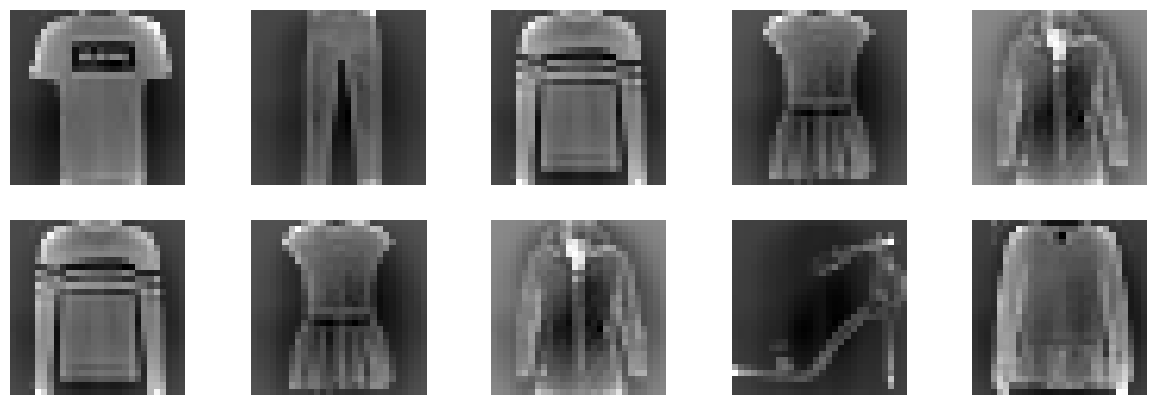

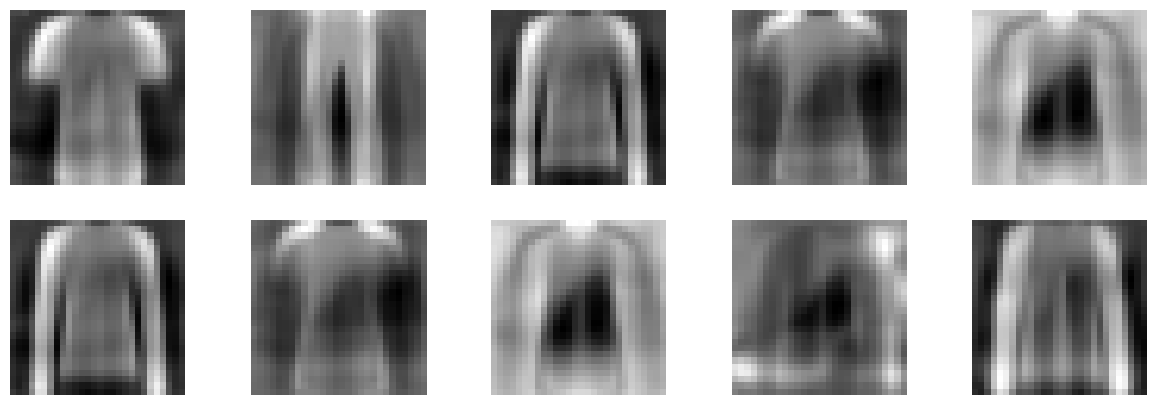

In [11]:
# Vizualizarea atributelor extrase
X_train = np.load('data/fashion/X_train.npy')
X_train20 = np.load('data/fashion/X_train20.npy')
y_train = np.load('data/fashion/y_train.npy')

im_reduced = np.array(list(map(lambda x: pca.inverse_transform(x), X_train20)))
reshaped = np.array(list(map(lambda x: x.reshape(1, -1), im_reduced)))

images =[]
orig_images = []
for label in range(0, 10):
    index = list(y_train).index(label)
    images.append(reshaped[index])
    orig_images.append(X_train[index])

plot_mnist_grid(orig_images, 2, 5, figsize=(15, 5))
plot_mnist_grid(images, 2, 5, figsize=(15, 5))
print(labels)

# Eliberarea memoriei
del X_train, X_train20, im_reduced, reshaped

### Attribute Extraction: HOG

In [12]:
# Procesare si vizualizare a algoritmului hog
def resize_image(img):
    resized_img = resize(img, (128, 64))
    return resized_img

# Aplicare hog
def apply_hog(resized_img):
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    return fd, hog_image

In [ ]:
# Procesare a algoritmului hog
X_trainHOG = []
hog_images = []
images = []
img_labels = []
i = 0

# Pregatirea datelor de antrenare
X_train = np.load('data/fashion/X_train.npy')
y_train = np.load('data/fashion/y_train.npy')
X_t = X_train.reshape(60000, 28, 28, 1)

for image in X_t:
    resized_img = resize_image(image)
    fd, hog_image = apply_hog(resized_img)
    X_trainHOG.append(fd)

    if(y_train[i] not in img_labels):
        hog_images.append(hog_image)
        images.append(image)
        img_labels.append(y_train[i])
    i += 1

# Date retinute pentru vizualizare
X_trainHOG = np.array(X_trainHOG)
hog_images = np.array(hog_images)
images = np.array(images)
print("Finished processing training set")

# Aplicam HOG pe setul de testare
X_testHOG = []
X_test = np.load('data/fashion/X_test.npy')
X_t = X_test.reshape(10000, 28, 28, 1)

for image in X_t:
    resized_img = resize_image(image)
    fd, _ = apply_hog(resized_img)
    X_testHOG.append(fd)

X_testHOG = np.array(X_testHOG)

print("Finished processing test set")
print(X_trainHOG.shape)
print(X_testHOG.shape)

# Salvarea datelor pe disk
np.save('data/fashion/X_trainHOG', X_trainHOG)
np.save('data/fashion/X_testHOG', X_testHOG)

# Eliberarea memoriei
del X_trainHOG, X_testHOG, X_train, X_test, y_train

Finished processing test set
(60000, 3780)
(10000, 3780)


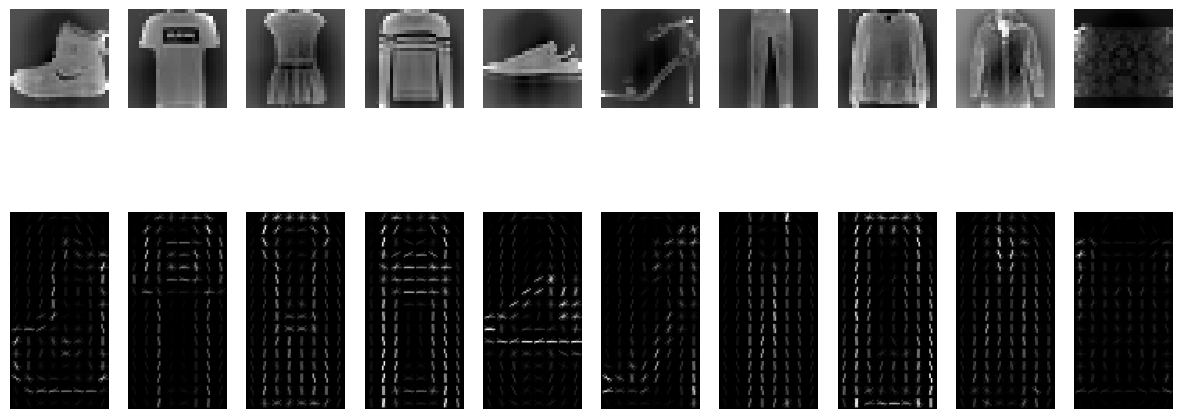

In [20]:
# Vizualizare atribute extrase
size = len(images)
fig, axs = plt.subplots(2, size, figsize=(15, 6))
for i in range(size):
    first_image = np.array(images[i])
    pixels = first_image.reshape((28, 28))

    axs[0, i].axis('off')
    axs[0, i].imshow(pixels, cmap="gray")
    axs[1, i].axis('off')
    axs[1, i].imshow(hog_images[i], cmap="gray")

### Attribute Extraction: HOG - PCA

In [16]:
# Aplicați PCA pe datele de antrenament și testare
X_train = np.load('data/fashion/X_trainHOG.npy')
X_test = np.load('data/fashion/X_testHOG.npy')

pca = PCA(n_components=20)
X_train20 = pca.fit_transform(X_train)
X_test20 = pca.transform(X_test)

# Vizualiare PCA
print(X_train.shape)
print(X_train20.shape)

# Salvarea datelor pe disk
np.save('data/fashion/X_train20_HOG', X_train20)
np.save('data/fashion/X_test20_HOG', X_test20)

# Eliberarea memoriei
del X_train20, X_test20, X_train

(60000, 3780)
(60000, 20)


### Attribute Selection

#### PCA features

In [ ]:
sel_variance = VarianceThreshold(threshold=0.03)
sel_percentile = SelectPercentile(percentile=80)

In [ ]:
X_train20 = np.load('data/fashion/X_train20_HOG.npy')
X_test20 = np.load('data/fashion/X_test20_HOG.npy')
y_train = np.load('data/fashion/y_train.npy')
y_test = np.load('data/fashion/y_test.npy')

print(f'PCA: X shape before applying variance threashold: {X_train20.shape}')
X_train20 = sel_variance.fit_transform(X_train20)
print(f'PCA: X shape after applying variance threashold: {X_train20.shape}')

X_train20 = sel_percentile.fit_transform(X_train20, y_train)
X_test20 = sel_percentile.transform(X_test20)
print(f'PCA: X shape after applying percentile selector: {X_train20.shape}')

# Salvarea datelor pe disk
np.save('data/fashion/X_train20_scaled', X_train20)
np.save('data/fashion/X_test20_scaled', X_test20)
del X_train20, X_test20, y_test

PCA: X shape before applying variance threashold: (60000, 20)
PCA: X shape after applying variance threashold: (60000, 20)
PCA: X shape after applying percentile selector: (60000, 16)


In [ ]:
# Incarcare date
X_train20 = np.load('data/fashion/X_train20_scaled.npy')
y_train = np.load('data/fashion/y_train.npy')

# Impartirea setului de date
X_train_final_pca, X_validation_pca, y_train_final_pca, y_validation_pca = train_test_split(X_train20, y_train) 

# Salvarea datelor pe disk
np.save('data/fashion/X_train_final_pca', X_train_final_pca)
np.save('data/fashion/X_validation_pca', X_validation_pca)
np.save('data/fashion/y_train_final_pca', y_train_final_pca)
np.save('data/fashion/y_validation_pca', y_validation_pca)

# Eliberare memorie
del X_train_final_pca, X_validation_pca, y_train_final_pca, y_validation_pca, y_train, X_train20

### Model Training

In [13]:
# Incarcarea datelor
X_train_final_pca = np.load('data/fashion/X_train_final_pca.npy')
X_validation_pca = np.load('data/fashion/X_validation_pca.npy')
y_train_final_pca = np.load('data/fashion/y_train_final_pca.npy')
y_validation_pca = np.load('data/fashion/y_validation_pca.npy')
X_test20_HOG = np.load('data/fashion/X_test20_scaled.npy')
y_test = np.load('data/fashion/y_test.npy')

##### Logistic Regresion

In [14]:
# Hyperparameter Tunning
param_grid = [
    {'penalty':['l1','l2'],
    'C' : [0.1, 1, 0.01],
    'solver': ['liblinear'],
    'max_iter'  : [500, 1000],
    'multi_class' : ['ovr']
    },
    {'penalty':['l2'],
    'C' : [0.1, 1, 0.01],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter'  : [500, 1000],
    'multi_class' : ['ovr', 'multinomial']
    },
    {'penalty':['elasticnet'],
    'C' : [0.1, 1, 0.01],
    'solver': ['saga'],
    'max_iter'  : [500, 1000],
    'l1_ratio' : [0, 0.1, 0.5],
    'multi_class' : ['ovr', 'multinomial']
    }
]

grid = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X_validation_pca, y_validation_pca)

# Training model
model = grid.best_estimator_
model.fit(X_train_final_pca, y_train_final_pca)
y_pred = model.predict(X_test20_HOG)

C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\AnaMi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Evaluare model
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Logistic Regression: {0:.2f}% \n".format(precision))

Accuracy with Logistic Regression considering first 20PC: 80.98% 



In [16]:
# Tabel cu metrici de performanță
target_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.81      0.78      0.79      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.74      0.68      0.71      1000
       Dress       0.81      0.85      0.83      1000
        Coat       0.68      0.69      0.69      1000
      Sandal       0.89      0.83      0.86      1000
       Shirt       0.56      0.57      0.56      1000
     Sneaker       0.82      0.87      0.84      1000
         Bag       0.92      0.95      0.93      1000
  Ankle boot       0.91      0.92      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [17]:
# Defining custom function which returns
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Tabel cu parametrii
df = pd.DataFrame(grid.cv_results_)
df = df[['param_penalty', 'param_C', 'param_solver', 'param_max_iter', 'param_multi_class', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Aplicare highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_penalty,param_C,param_solver,param_max_iter,param_multi_class,mean_test_score
l2,1.000000,lbfgs,1000,multinomial,0.807533
l2,1.000000,lbfgs,500,multinomial,0.807533
l2,1.000000,newton-cg,1000,multinomial,0.807333
l2,1.000000,newton-cg,500,multinomial,0.807333
elasticnet,1.000000,saga,500,multinomial,0.807333
elasticnet,1.000000,saga,1000,multinomial,0.807333
elasticnet,1.000000,saga,1000,multinomial,0.807333
elasticnet,1.000000,saga,500,multinomial,0.807333
elasticnet,1.000000,saga,1000,multinomial,0.807200
elasticnet,1.000000,saga,500,multinomial,0.807200


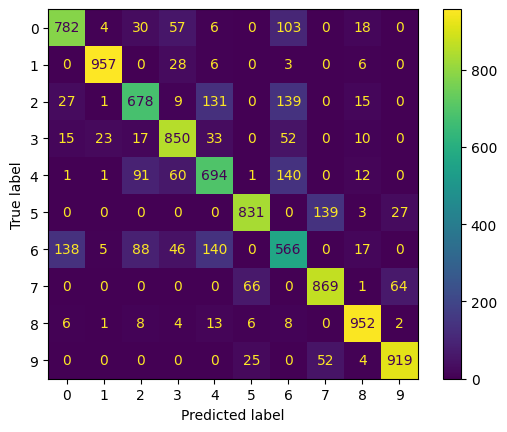

In [18]:
# Matrice de confuzie
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

##### SMV

In [19]:
# Hyperparameter Tunning
param_grid = {'C': [1, 10, 30],
              'kernel': ['poly', 'rbf']
            }
grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='accuracy', n_jobs=-1)
grid.fit(X_validation_pca, y_validation_pca)

# Training model
model = grid.best_estimator_
model.fit(X_train_final_pca, y_train_final_pca)
y_pred = model.predict(X_test20_HOG)

In [ ]:
# Evaluare model
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}% \n".format(precision))

Accuracy with Logistic Regression considering first 20PC: 87.54% 



In [21]:
# Tabel cu metrici de performanță
target_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.84      0.85      0.84      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.86      0.89      0.88      1000
        Coat       0.78      0.81      0.79      1000
      Sandal       0.96      0.91      0.94      1000
       Shirt       0.71      0.66      0.68      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



In [22]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Tabel cu parametrii
df = pd.DataFrame(grid.cv_results_)
df = df[['param_C', 'param_kernel', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Aplicare highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_C,param_kernel,mean_test_score
10,rbf,0.865267
30,rbf,0.864800
10,poly,0.862400
30,poly,0.861400
1,rbf,0.854333
1,poly,0.850200


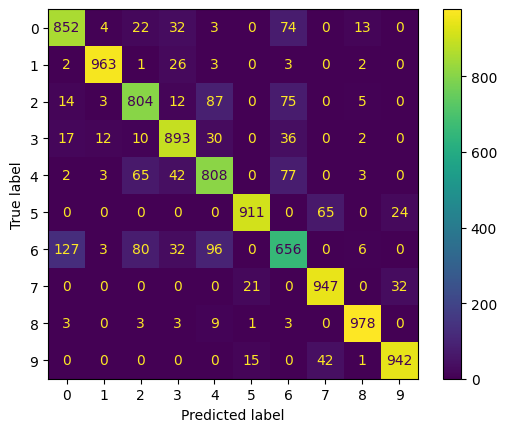

In [23]:
# Matrice de confuzie
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

##### Random Forest

In [24]:
# Hyperparameter Tunning
param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 8, 12, None],
    'max_samples': [0.3, 0.7, 1.0, None]
} 

grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X_validation_pca, y_validation_pca)

# Training model
model = grid.best_estimator_
model = model.fit(X_train_final_pca, y_train_final_pca)
y_pred = model.predict(X_test20_HOG)

In [25]:
# Evaluare model
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Random Forest: {0:.2f}% \n".format(precision))

Accuracy with Random Forest: 85.29% 



In [26]:
# Tabel cu metrici de performanță
target_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.82      0.81      0.82      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.79      0.79      0.79      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.76      0.78      0.77      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.66      0.62      0.64      1000
     Sneaker       0.89      0.91      0.90      1000
         Bag       0.93      0.96      0.95      1000
  Ankle boot       0.93      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [27]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Tabel cu parametrii
df = pd.DataFrame(grid.cv_results_)
df = df[['param_n_estimators', 'param_max_depth', 'param_max_samples', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Aplicare highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_n_estimators,param_max_depth,param_max_samples,mean_test_score
150,None,1.000000,0.843400
100,None,1.000000,0.841600
150,None,0.700000,0.841000
150,None,None,0.840600
100,None,0.700000,0.840267
100,None,None,0.839667
50,None,None,0.837933
50,None,1.000000,0.837800
50,None,0.700000,0.837533
150,None,0.300000,0.833600


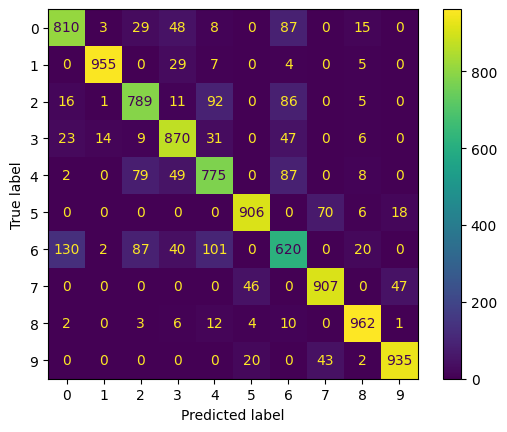

In [28]:
# Matrice de confuzie
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

##### Gradient Boosted Trees

In [29]:
# Hyperparameter Tunning
param_grid = {
    "max_depth": [2, 4, 6], 
    "num_parallel_tree": [1, 3, 5],
    "eta": [0.15, 0.3, 0.45]
}
grid = GridSearchCV(
    xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count()),
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)
grid.fit(X_validation_pca, y_validation_pca)

# Training model 
model = grid.best_estimator_
model = model.fit(X_train_final_pca, y_train_final_pca)
y_pred = model.predict(X_test20_HOG)

In [30]:
# Evaluare model
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Logistic Regression considering first 20PC: {0:.2f}% \n".format(precision))

Accuracy with Logistic Regression considering first 20PC: 85.83% 



In [31]:
# Tabel cu metrici de performanță
target_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.83      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.86      0.87      0.86      1000
        Coat       0.75      0.77      0.76      1000
      Sandal       0.94      0.91      0.92      1000
       Shirt       0.65      0.65      0.65      1000
     Sneaker       0.90      0.92      0.91      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [32]:
def highlight_max(s): 
    is_max = s == s.max() 
    return ['color: green; font-weight: bold;' if cell else '' for cell in is_max] 

# Tabel cu parametrii
df = pd.DataFrame(grid.cv_results_)
df = df[['param_max_depth', 'param_num_parallel_tree', 'param_eta', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending=False)

# Aplicare highlight
df_styled = df.style.apply(highlight_max).hide(axis="index")
df_styled

param_max_depth,param_num_parallel_tree,param_eta,mean_test_score
6,5,0.300000,0.849267
6,1,0.300000,0.849200
6,3,0.300000,0.849200
6,3,0.450000,0.848200
6,5,0.450000,0.848200
6,1,0.450000,0.848200
6,1,0.150000,0.847667
6,3,0.150000,0.847667
6,5,0.150000,0.847600
4,1,0.300000,0.845000


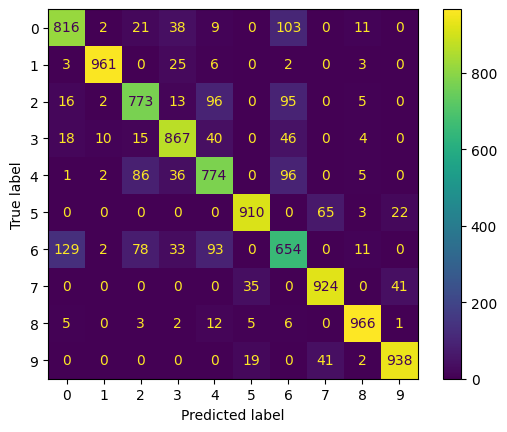

In [33]:
# Matrice de confuzie
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [34]:
del X_train_final_pca, X_validation_pca, y_train_final_pca, y_validation_pca, X_test20_HOG, y_test